<a href="https://colab.research.google.com/github/maazansariX/maazansariX/blob/main/Python_Case_Study_Business_Case_of_Walmart_Analysis_%26_Insights_by_Maaz_Ansari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

# BUSINESS CASE: **WALMART**
PROJECT & INSIGHTS ON PYTHON BY: **MAAZ ANSARI**

**About WALMART**\
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**Business Problem by Scaler & Solution by Maaz Ansari**\
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

# Dataset
The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: Walmart_data.csv


Dataset link: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094


## **Schema of Data:**

* **User_ID**                 : User ID
* **Product_ID**		          : Product ID
* **Gender**		              : Sex of User
* **Age**	                    : Age in Bins
* **Occupation**	            : Occupation (Masked)
* **City_Category**	          : Category of the City (A,B,C)
* **StayInCurrentCityYears**	: Number of years stay in current city
* **Marital Status**          : Marital Status
* **ProductCategory**         : Product Category (Masked)
* **Purchase**	  	          : Purchase Amount

# 2. Exploratory Data Analysis

In [ ]:
"Step1: Importing Python Libraries Aerofit Business Case"

'Step1: Importing Python Libraries Aerofit Business Case'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

In [ ]:
"Step 2: Upload of Walmart Data - Provided by Scaler"

In [4]:
from google.colab import files
uploaded = files.upload()

Saving walmart_data.csv to walmart_data.csv


In [ ]:
"Step 3: Read Walmart data"

In [128]:
w = pd.read_csv("walmart_data.csv")

w.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [129]:
w.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [7]:
w.shape

(550068, 10)

In [ ]:
#Observations:
'''
No. of Rows: 550,068
No. of Columns: 10
'''

In [8]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
#Observations
'''
1. From the above analysis, it is clear that, data has total of 10 features with mix of alphanumeric data.
2. Apart from 'Purchase' column, all other data types are of categorical type. We will change the datatype of all remaining columns.
'''

# Changing Data Types of Columns

In [9]:
for i in w.columns[:-1]:
  w[i] = w[i].astype("category")
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


# Statistical Summary

CATEGORICAL COLUMNS

In [10]:
w.describe(include = "category")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [ ]:
#Observations
'''

USER ID:
1. There are total 5891 Unique customers visiting the Walmart stores who became repeat customers.

PRODUCT ID:
1. Total no. of unique product types were 3631 which customers have purchased from this Walmart store.
2. Largest selling product is P00265242.

GENDER:
1. Out of 5,50,068 transactions, 4,14,259 (nearly 75%) were done by Male gender indicating a significant disparity
in purchase behavior between Males and Females during the Black Friday event.

AGE:
1. We have 7 unique age groups, with the most prominent being the age group of 26-35.
2. This age group of 26-35 has a maximum of 2,19,587 transactions.

STAY IN CURRENT CITY YEARS
1. Customers with 1 year of stay in current city accounted to maximum of 1,93,821 transactions among
all the other customers with (0,2,3,4+) years of stay in current city.

MARITAL STATUS:
1. 59% of the total transactions were done by Unmarried Customers and 41% by Married Customers.

PRODUCT CATEGORY:
1. Total unique product categories are 20 and 5 specific categories topped the sales.
2. Total no. of transactions of 5 Top product categories were 150,933.

'''

NUMERICAL COLUMNS

In [11]:
w.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [12]:
median = w["Purchase"].median()
median

8047.0

In [ ]:
#Observations
'''
1. The purchase amounts vary widely, with the minimum recorded purchase being $12 and the maximum reaching $23961.
2. The median purchase amount of $8047 is notably lower than the mean purchase amount of $9264,
indicating a right-skewed distribution where a few high-value purchases pull up the mean.
'''

# Duplicate Detection

In [13]:
w.duplicated().value_counts()

False    550068
dtype: int64

In [ ]:
#Observations
'''

1. There are no duplicates in the dataset.

'''

# Sanity Check for Columns

In [17]:
for i in w.columns:
  print("Unique value in ",i," columns are: ")
  print(w[i].unique())
  print("-"*100)

Unique value in  User_ID  columns are: 
[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]
----------------------------------------------------------------------------------------------------
Unique value in  Product_ID  columns are: 
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942']
----------------------------------------------------------------------------------------------------
Unique value in  Gender  columns are: 
['F', 'M']
Categories (2, object): ['F', 'M']
----------------------------------------------------------------------------------------------------
Unique

In [ ]:
#Observations:
'''
1. Dataset doesn't contain any unusual values or abnormal ones
'''

# Missing Value Analysis

In [ ]:
w.isnull().sum()

In [ ]:
#Observation:
'''
1. Dataset has no null values
'''

# Memory Optimization

In [80]:
# Converting User_ID column datatype to int32
w["User_ID"] = w["User_ID"].astype("int32")

In [130]:
# Updating 'Marital_Status' column
w["Marital_Status"] = w["Marital_Status"].apply(lambda x: "Married" if x == 1 else "Unmarried")

In [131]:
w.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,Married,20,368
550064,1006035,P00375436,F,26-35,1,C,3,Unmarried,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,F,55+,1,C,2,Unmarried,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,Married,20,490


In [87]:
# Converting 'Product_Category' column datatype to int8
w['Product_Category'] = w['Product_Category'].astype('int8')

In [88]:
# Converting 'Occupation' column's datatype to int8
w['Occupation'] = w['Occupation'].astype('int8')

In [89]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int32   
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int8    
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int8    
 9   Purchase                    550068 non-null  int64   
dtypes: category(6), int32(1), int64(1), int8(2)
memory usage: 11.2 MB


In [ ]:
#Observation:
'''
Earlier the dataframe took 42.0+ MB of memory but the memory usage is optimize between 10 to 12 MB (71% reduction in the memory usage).
'''

# Unique Attributes & Values

In [96]:
#USER_ID

w["User_ID"].nunique()

5891

In [ ]:
#Observation:
'''
1. Total no. of unique customers are 5,891
'''

In [97]:
#GENDER

np.round(w["Gender"].value_counts(normalize = True) * 100, 2)

M    75.31
F    24.69
Name: Gender, dtype: float64

In [ ]:
#Observations:
'''
1. It is clear that the maximum no. of buyers are usually Males, 3 in 4.
2. Females on the other hand constitutes very less buying count under 25%.
'''

In [105]:
np.round(w["Occupation"].value_counts(normalize = True) * 100, 2).cumsum()

4     13.15
0     25.81
7     36.56
1     45.18
17    52.46
20    58.56
12    64.23
14    69.19
2     74.02
16    78.63
6     82.33
3     85.54
10    87.89
5     90.10
15    92.31
11    94.42
19    95.96
13    97.36
18    98.56
9     99.70
8     99.98
Name: Occupation, dtype: float64

In [ ]:
#Observation:
'''
1. It can be inferred from the above that 82.33 % of the total transactions are made by the customers belonging to 11 occupations.
2. These are 4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6 (Ordered in descending order of the total transactions' share.)
'''

In [110]:
#Stay_In_Current_City_Years

np.round(w['Stay_In_Current_City_Years'].value_counts(normalize = True) * 100, 2).cumsum()

1      35.24
2      53.75
3      71.07
4+     86.47
0     100.00
Name: Stay_In_Current_City_Years, dtype: float64

In [ ]:
#Observation:
'''
1. From the above result, it is clear that majority of the transactions (53.75 % of total transactions)
are made by the customers having 1 or 2 years of stay in the current city.

In [111]:
#Product_Category

np.round(w['Product_Category'].value_counts(normalize = True).head(10) * 100, 2).cumsum()

5     27.44
1     52.96
8     73.67
11    78.09
2     82.43
6     86.15
3     89.82
4     91.96
16    93.75
15    94.89
Name: Product_Category, dtype: float64

In [ ]:
#Observation:
'''
1. It can be inferred from the above result that 82.43% of the total transactions are made for only 5 Product Categories.
2. These are 5, 1, 8, 11 and 2.
'''

**GENDER VIEW**
1. Unique Customers for Each Gender

In [117]:
w_gender_dist = pd.DataFrame(w.groupby("Gender")["User_ID"].nunique()).reset_index().rename(columns = {"User_ID":"Unique_Customers"})
w_gender_dist["Percent_Share"] = np.round(w_gender_dist["Unique_Customers"]/w_gender_dist["Unique_Customers"].sum()*100, 2)
w_gender_dist

,Gender,Unique_Customers,Percent_Share
0,F,1666,28.28
1,M,4225,71.72


2. Transactions made by each gender category

In [116]:
w.groupby("Gender")["User_ID"].count()

Gender
F    135809
M    414259
Name: User_ID, dtype: int64

In [118]:
print('Average number of transactions made by each Male on Black Friday is', round(414259 / 4225))
print('Average number of transactions made by each Female on Black Friday is', round(135809 / 1666))

Average number of transactions made by each Male on Black Friday is 98
Average number of transactions made by each Female on Black Friday is 82


3. Total Revenues generated by Walmart from each Gender

In [120]:
w_gender_revenue = w.groupby('Gender')['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
w_gender_revenue['percent_share'] = np.round((w_gender_revenue['Purchase'] / w_gender_revenue['Purchase'].sum()) * 100, 2)
w_gender_revenue

,Gender,Purchase,percent_share
0,M,3909580100,76.72
1,F,1186232642,23.28


4. Average purchases made by each user in each gender

In [125]:
w_gender_avg = pd.DataFrame(w.groupby(by = ['Gender', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})
w_gender_avg.groupby(by = 'Gender')['Average_Purchase'].mean()

Gender
F    201363.544729
M    663653.047021
Name: Average_Purchase, dtype: float64

**MARITAL STATUS VIEW**
1. Unique customers for each Marital Status

In [132]:
w_marital_status_dist = pd.DataFrame(w.groupby(by = ['Marital_Status'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
w_marital_status_dist['percent_share'] = np.round(w_marital_status_dist['unique_customers'] / w_marital_status_dist['unique_customers'].sum() * 100, 2)
w_marital_status_dist

,Marital_Status,unique_customers,percent_share
0,Married,2474,42.0
1,Unmarried,3417,58.0


2. Transactions made by each Marital Status category

In [134]:
w.groupby('Marital_Status')['User_ID'].count()

Marital_Status
Married      225337
Unmarried    324731
Name: User_ID, dtype: int64

In [136]:
print('Average number of transactions made by each user being Married is', round(225337 / 2474))
print('Average number of transactions made by each user being Unmarried is', round(324731 / 3417))

Average number of transactions made by each user being Married is 91
Average number of transactions made by each user being Unmarried is 95


3. Total Revenue generated by Walmart from each Marital Status

In [138]:
w_marital_status_revenue = w.groupby('Marital_Status')['Purchase'].sum().to_frame().sort_values('Purchase', ascending = False).reset_index()
w_marital_status_revenue['percent_share'] = np.round((w_marital_status_revenue['Purchase'] / w_marital_status_revenue['Purchase'].sum()) * 100, 2)
w_marital_status_revenue

,Marital_Status,Purchase,percent_share
0,Unmarried,3008927447,59.05
1,Married,2086885295,40.95


4. Average purchases made by each user in each Marital Status

In [139]:
w_marital_status_avg = pd.DataFrame(w.groupby(by = ['Marital_Status', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})
w_marital_status_avg.groupby(by = 'Marital_Status')['Average_Purchase'].mean()

Marital_Status
Married      843526.796686
Unmarried    880575.781972
Name: Average_Purchase, dtype: float64

**AGE VIEW**

1. Customer Distribution by Age Group

In [158]:
w_age_dist = pd.DataFrame(w.groupby('Age')['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'Unique_customers'}).sort_values(by = 'Unique_customers', ascending = False)
w_age_dist['Percent_Share'] =  np.round(w_age_dist['Unique_customers'] / w_age_dist['Unique_customers'].sum() * 100, 2)
w_age_dist['Cumulative_Percent'] =  w_age_dist['Percent_Share'].cumsum()
w_age_dist

,Age,Unique_customers,Percent_Share,Cumulative_Percent
2,26-35,2053,34.85,34.85
3,36-45,1167,19.81,54.66
1,18-25,1069,18.15,72.81
4,46-50,531,9.01,81.82
5,51-55,481,8.16,89.98
6,55+,372,6.31,96.29
0,0-17,218,3.70,99.99


[]

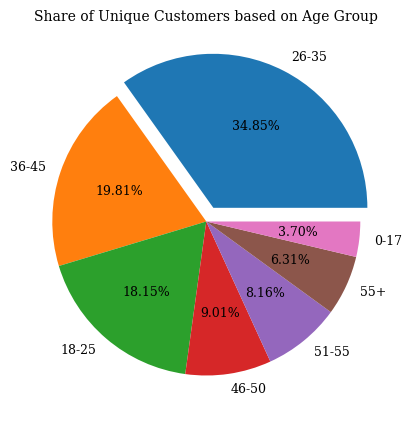

In [163]:
#Plot Pie Graph for Representation of Customers by Age Bracket

plt.figure(figsize = (10,5))
plt.title("Share of Unique Customers based on Age Group", fontdict = {
    'fontsize': 10, 'fontstyle': "normal", 'fontfamily': "serif", 'fontweight': 250})
plt.pie(x = w_age_dist["Percent_Share"],
        labels = w_age_dist["Age"],
        explode = [0.1] + [0]*6,
        autopct = '%.2f%%',
        textprops = {'fontsize' : 9,
                   'fontstyle' : 'normal',
                   'fontfamily' : 'serif',
                   'fontweight' : 250})
plt.plot()

2. Revenue Distribution by Age Group

In [154]:
w['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [156]:
w_age_revenue = pd.DataFrame(w.groupby('Age', as_index = False)['Purchase'].sum()).sort_values(by = 'Purchase', ascending = False)
w_age_revenue['Percent_Share'] = np.round((w_age_revenue['Purchase'] / w_age_revenue['Purchase'].sum()) * 100, 2)
w_age_revenue['Cumulative_Percent_share'] = w_age_revenue['Percent_Share'].cumsum()
w_age_revenue

,Age,Purchase,Percent_Share,Cumulative_Percent_share
2,26-35,2031770578,39.87,39.87
3,36-45,1026569884,20.15,60.02
1,18-25,913848675,17.93,77.95
4,46-50,420843403,8.26,86.21
5,51-55,367099644,7.20,93.41
6,55+,200767375,3.94,97.35
0,0-17,134913183,2.65,100.00


[]

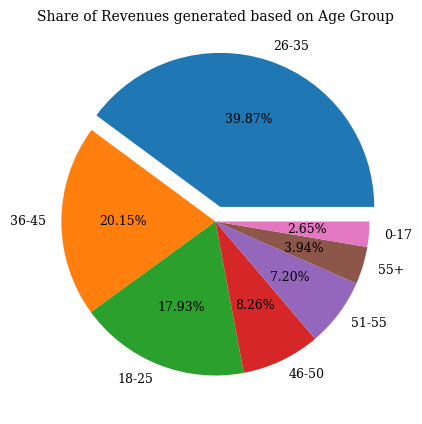

In [162]:
#Plot Pie Graph for Representation of Revenues generated by Age Bracket

plt.figure(figsize = (10,5))
plt.title("Share of Revenues generated based on Age Group", fontdict = {
    'fontsize': 10, 'fontstyle': "normal", 'fontfamily': "serif", 'fontweight': 250})
plt.pie(x = w_age_revenue["Percent_Share"],
        labels = w_age_dist["Age"],
        explode = [0.1] + [0]*6,
        autopct = '%.2f%%',
        textprops = {'fontsize' : 9,
                   'fontstyle' : 'normal',
                   'fontfamily' : 'serif',
                   'fontweight' : 250})
plt.plot()

**CITY CATEGORY VIEW**

1. Customer Distribution by City Category

In [165]:
w_city_dist = pd.DataFrame(w.groupby('City_Category')['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'Unique_Customers'})
w_city_dist['Percent_Share'] = np.round((w_city_dist['Unique_Customers'] / w_city_dist['Unique_Customers'].sum()) * 100, 2)
w_city_dist['Cumulative_Percent_share'] = w_city_dist['Percent_Share'].cumsum()
w_city_dist

,City_Category,Unique_Customers,Percent_Share,Cumulative_Percent_share
0,A,1045,17.74,17.74
1,B,1707,28.98,46.72
2,C,3139,53.28,100.00


[]

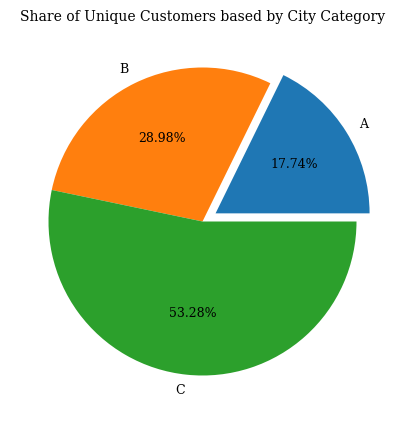

In [173]:
#Plot Pie Graph for Representation of Customers by City Category

plt.figure(figsize = (10,5))
plt.title("Share of Unique Customers based by City Category", fontdict = {
    'fontsize': 10, 'fontstyle': "normal", 'fontfamily': "serif", 'fontweight': 250})
plt.pie(x = w_city_dist["Percent_Share"],
        labels = w_city_dist["City_Category"],
        explode = [0.1] + [0]*2,
        autopct = '%.2f%%',
        textprops = {'fontsize' : 9,
                   'fontstyle' : 'normal',
                   'fontfamily' : 'serif',
                   'fontweight' : 250})
plt.plot()

2. Revenues generated by City Category

In [166]:
w['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [175]:
w_city_revenue = w.groupby('City_Category')['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
w_city_revenue['Percent_Share'] = np.round((w_city_revenue['Purchase'] / w_city_revenue['Purchase'].sum()) * 100, 2)
w_city_revenue['cumulative_percent_share'] = w_city_revenue['Percent_Share'].cumsum()
w_city_revenue

,City_Category,Purchase,Percent_Share,cumulative_percent_share
0,B,2115533605,41.52,41.52
1,C,1663807476,32.65,74.17
2,A,1316471661,25.83,100.00


[]

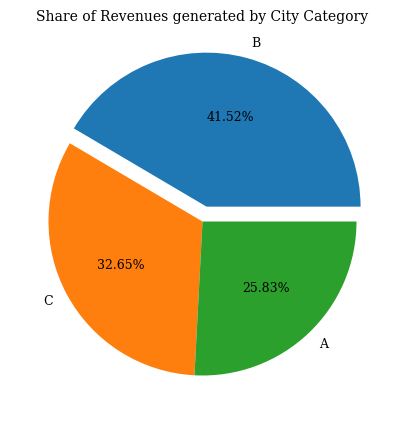

In [176]:
#Plot Pie Graph for Representation of Revenues generated by City Category

plt.figure(figsize = (10,5))
plt.title("Share of Revenues generated by City Category", fontdict = {
    'fontsize': 10, 'fontstyle': "normal", 'fontfamily': "serif", 'fontweight': 250})
plt.pie(x = w_city_revenue["Percent_Share"],
        labels = w_city_revenue["City_Category"],
        explode = [0.1] + [0]*2,
        autopct = '%.2f%%',
        textprops = {'fontsize' : 9,
                   'fontstyle' : 'normal',
                   'fontfamily' : 'serif',
                   'fontweight' : 250})
plt.plot()

**PRODUCT CATEGORY VIEW**

1. Product Category & Product_ID

In [179]:
w.groupby('Product_Category')['Product_ID'].nunique()

Product_Category
1      493
2      152
3       90
4       88
5      967
6      119
7      102
8     1047
9        2
10      25
11     254
12      25
13      35
14      44
15      44
16      98
17      11
18      30
19       2
20       3
Name: Product_ID, dtype: int64

2. Revenue generated from different product categories

In [178]:
w_product_revenue = w.groupby('Product_Category')['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
w_product_revenue['Percent_Share'] = np.round((w_product_revenue['Purchase'] / w_product_revenue['Purchase'].sum()) * 100, 2)
w_product_revenue['Cumulative_Percent_Share'] = w_product_revenue['Percent_Share'].cumsum()
w_product_revenue

,Product_Category,Purchase,Percent_Share,Cumulative_Percent_Share
0,1,1910013754,37.48,37.48
1,5,941835229,18.48,55.96
2,8,854318799,16.77,72.73
3,6,324150302,6.36,79.09
4,2,268516186,5.27,84.36
5,3,204084713,4.00,88.36
6,16,145120612,2.85,91.21
7,11,113791115,2.23,93.44
8,10,100837301,1.98,95.42
9,15,92969042,1.82,97.24


3. Top 5 & Top 10 Product Categories

In [189]:
Top5 = w_product_revenue.head(5)['Purchase'].sum() /  w_product_revenue['Purchase'].sum()
Top5 = np.round(Top5 * 100, 2)
print(f'Top 5 product categories from which Walmart makes {Top5}% of total revenue are : {list(w_product_revenue["Product_Category"].head(5))}')

Top 5 product categories from which Walmart makes 84.36% of total revenue are : [1, 5, 8, 6, 2]


In [188]:
Top10 = w_product_revenue.head(10)['Purchase'].sum() /  w_product_revenue['Purchase'].sum()
Top10 = np.round(Top10 * 100, 2)
print(f'Top 10 product categories from which Walmart makes {Top10}% of total revenue are : {list(w_product_revenue["Product_Category"].head(10))}')

Top 10 product categories from which Walmart makes 97.25% of total revenue are : [1, 5, 8, 6, 2, 3, 16, 11, 10, 15]


[]

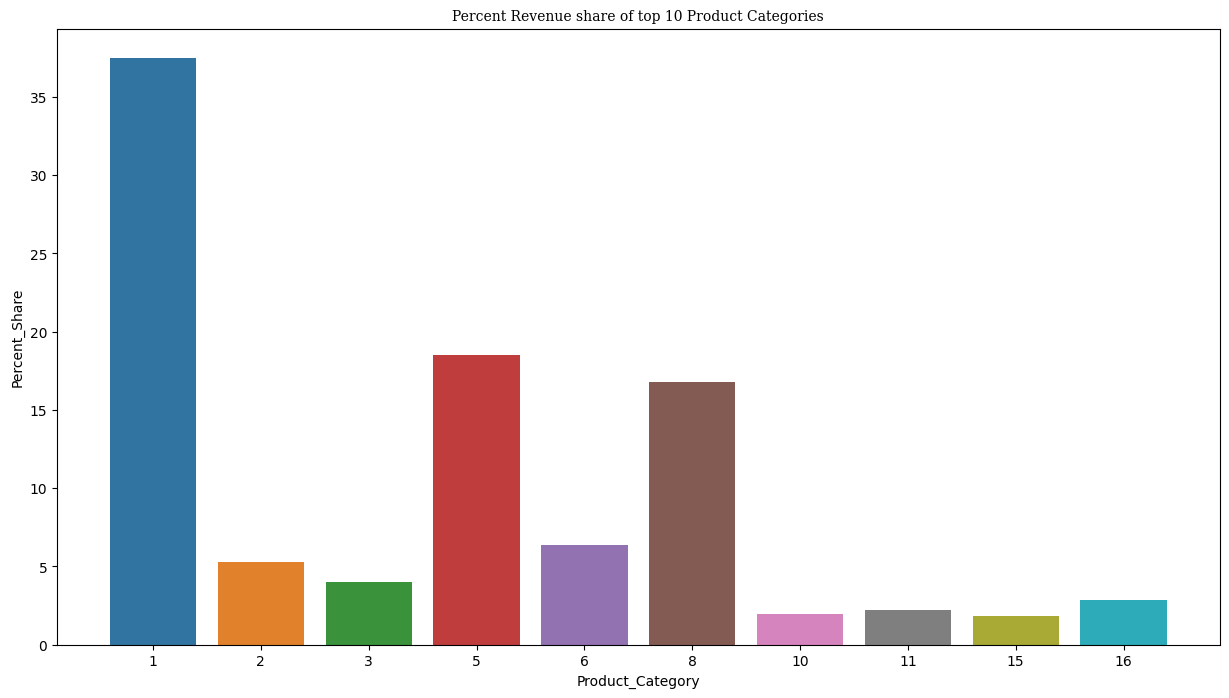

In [191]:
plt.figure(figsize = (15, 8))
plt.title('Percent Revenue share of top 10 Product Categories', fontsize = 10, fontweight = 250, fontfamily = 'serif', fontstyle = 'normal')
sns.barplot(data = w_product_revenue, x = w_product_revenue.head(10)['Product_Category'], y = w_product_revenue.head(10)['Percent_Share'])
plt.plot()

**Distribution of Transactions by Gender, Marital_Status, City_Category**

[]

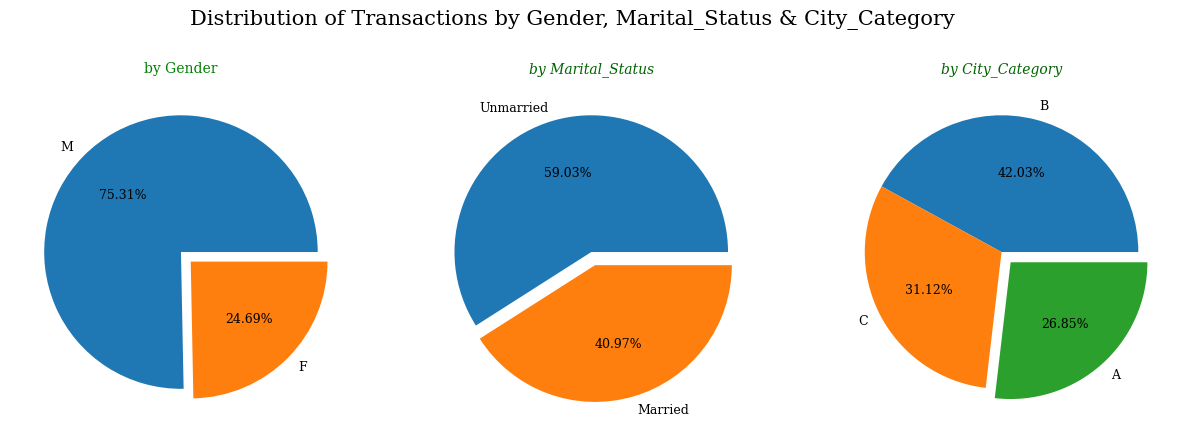

In [211]:
plt.figure(figsize = (15, 5))
plt.suptitle('Distribution of Transactions by Gender, Marital_Status & City_Category',
             fontsize = 15, fontweight = 250, fontfamily = 'serif', fontstyle = 'normal')

plt.subplot(1, 3, 1)

plt.title('by Gender', color = 'green', fontdict =
 {'fontsize' : 10, 'fontweight' : 250, 'fontstyle' : 'normal', 'fontfamily' : 'serif'})

w_gender_dist = np.round(w['Gender'].value_counts(normalize = True) * 100, 2)

plt.pie(x = w_gender_dist.values, labels = w_gender_dist.index,
        explode = [0, 0.1], autopct = '%.2f%%',
       textprops = {'fontsize' : 9, 'fontstyle' : 'normal', 'fontfamily' : 'serif', 'fontweight' : 250})

plt.subplot(1, 3, 2)

plt.title('by Marital_Status', color = 'darkgreen', fontdict =
  {'fontsize' : 10, 'fontweight' : 250, 'fontstyle' : 'oblique', 'fontfamily' : 'serif'})

w_Marital_Status_dist = np.round(w['Marital_Status'].value_counts(normalize = True) * 100, 2)

plt.pie(x = w_Marital_Status_dist.values, labels = w_Marital_Status_dist.index,
        explode = [0, 0.1], autopct = '%.2f%%',
       textprops = {'fontsize' : 9, 'fontstyle' : 'normal', 'fontfamily' : 'serif', 'fontweight' : 250})

plt.subplot(1, 3, 3)

plt.title('by City_Category', color = 'darkgreen', fontdict =
  {'fontsize' : 10, 'fontweight' : 250, 'fontstyle' : 'oblique', 'fontfamily' : 'serif'})

w_City_Category_dist = np.round(w['City_Category'].value_counts(normalize = True) * 100, 2)

plt.pie(x = w_City_Category_dist.values, labels = w_City_Category_dist.index,
        explode = [0,0, 0.1], autopct = '%.2f%%',
       textprops = {'fontsize' : 9, 'fontstyle' : 'normal', 'fontfamily' : 'serif', 'fontweight' : 250})

plt.plot()

# **UNIVARIATE ANALYSIS**

1. Purchase - Mean, Outlier, Range

[]

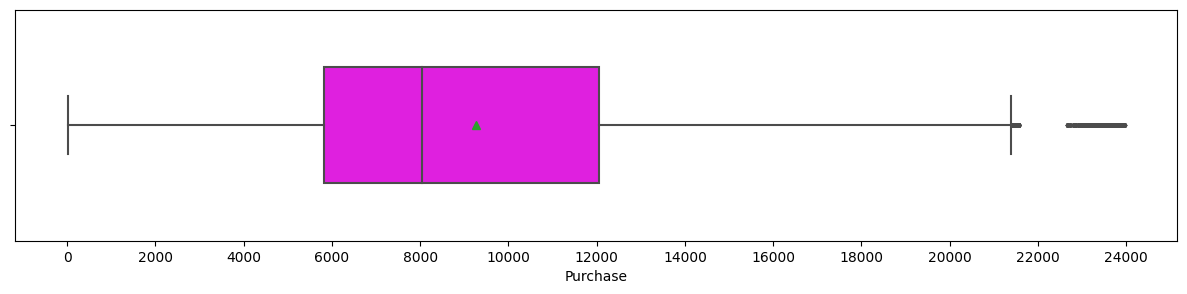

In [217]:
plt.figure(figsize = (15, 3))
sns.boxplot(data = w,
            x = 'Purchase',
            showmeans = True,
            fliersize = 2,
            width = 0.5,
            color = np.random.choice(['magenta', 'red', 'cyan']))
plt.xticks(np.arange(0, 25001, 2000))
plt.plot()

2. Purchase Frequecy / Count

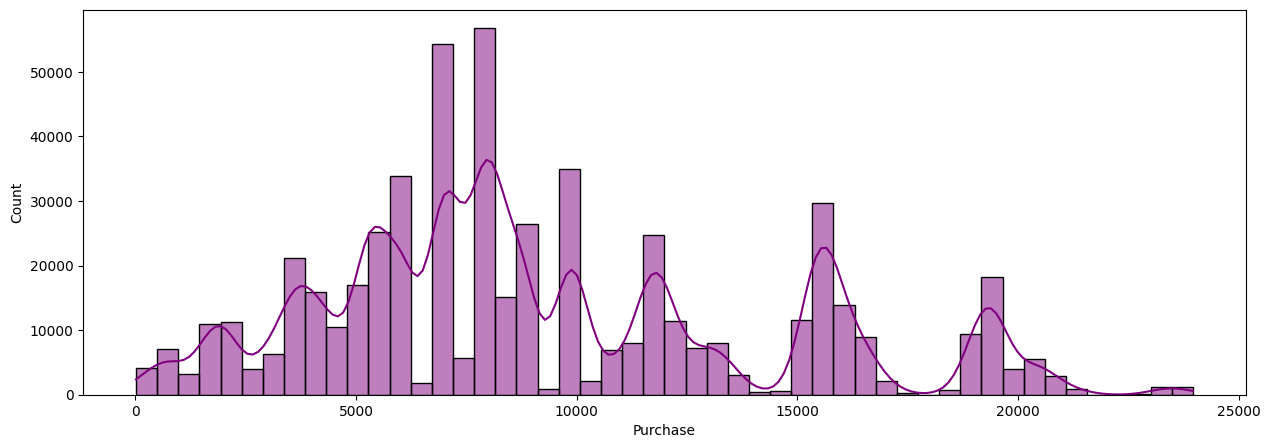

In [219]:
plt.figure(figsize = (15, 5))
sns.histplot(data = w, x = 'Purchase', kde = True, bins = 50, color = "purple")
plt.show()

3. Purchase - Distribution of Transactions by Each User

[]

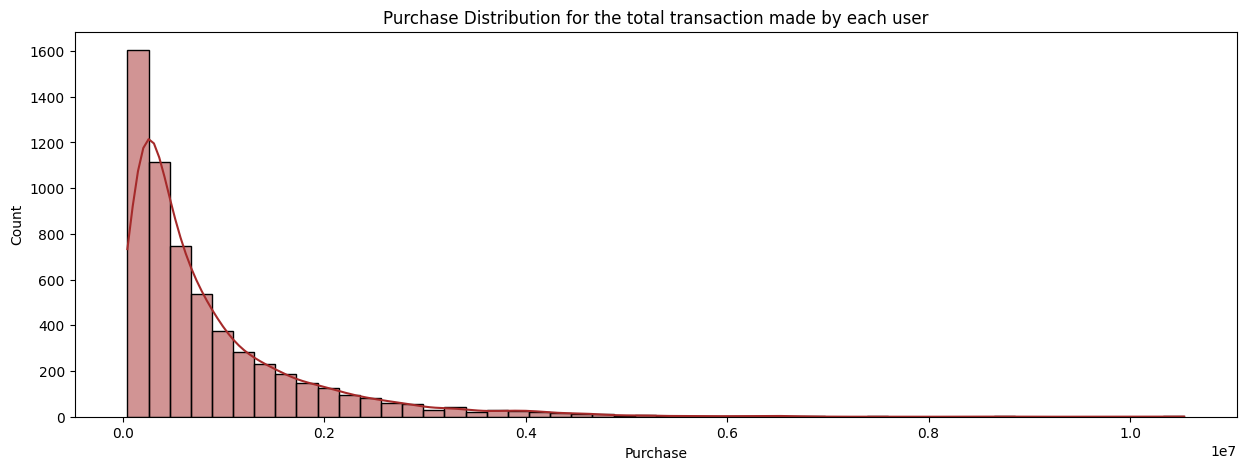

In [221]:
plt.figure(figsize = (15, 5))
plt.title('Purchase Distribution for the total transaction made by each user')
w_customer = w.groupby(by = 'User_ID')['Purchase'].sum()
sns.histplot(data = w_customer, kde = True, bins = 50, color = "brown")
plt.plot()

4. Distribution of Purchase Per Transaction by Gender

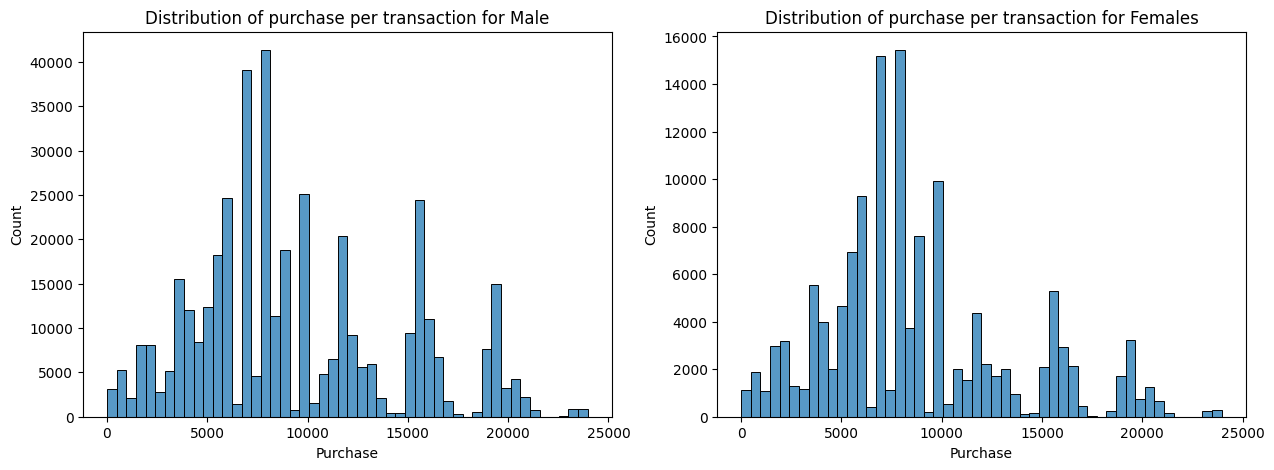

In [226]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('Distribution of purchase per transaction for Male')
w_male = w[w['Gender'] == 'M']
sns.histplot(data = w_male, x = 'Purchase', bins = 50)


plt.subplot(1, 2 ,2)
plt.title('Distribution of purchase per transaction for Females')
w_female = w[w['Gender'] == 'F']
sns.histplot(data = w_female, x = 'Purchase', bins = 50)

plt.show()

In [230]:
w_cust_gender = pd.DataFrame(w.groupby(['Gender', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
w_cust_gender

,Gender,User_ID,Total_Purchase
0,F,1000001,334093
1,F,1000006,379930
2,F,1000010,2169510
3,F,1000011,557023
4,F,1000016,150490
...,...,...,...
5886,M,1006030,737361
5887,M,1006032,517261
5888,M,1006033,501843
5889,M,1006034,197086


In [233]:
w_male_customer = w_cust_gender.loc[w_cust_gender['Gender'] == 'M']
w_female_customer = w_cust_gender.loc[w_cust_gender['Gender'] == 'F']

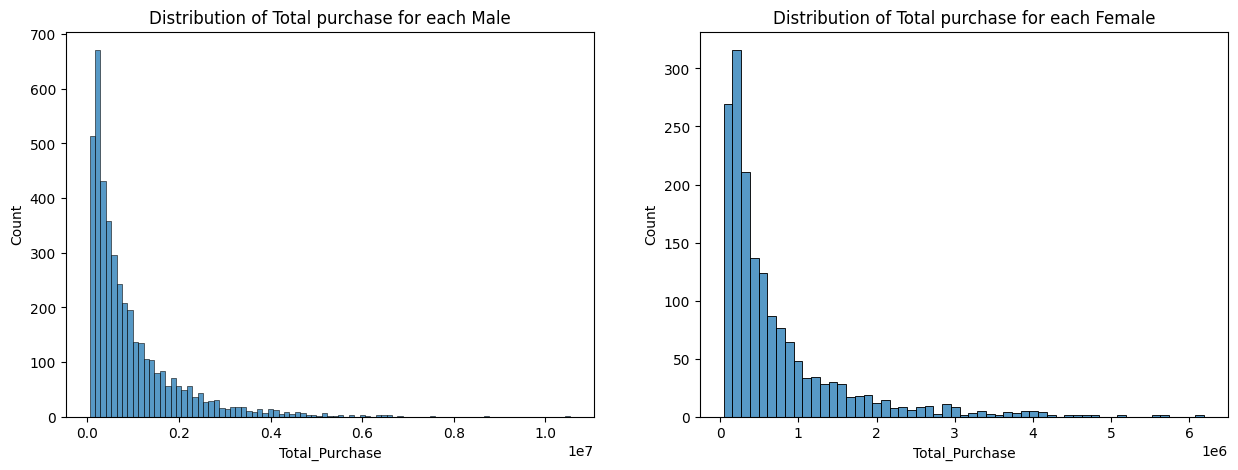

In [236]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.title('Distribution of Total purchase for each Male')
sns.histplot(data = w_male_customer, x = 'Total_Purchase')

plt.subplot(1, 2 ,2)
plt.title('Distribution of Total purchase for each Female')
sns.histplot(data = w_female_customer, x = 'Total_Purchase')

plt.show()

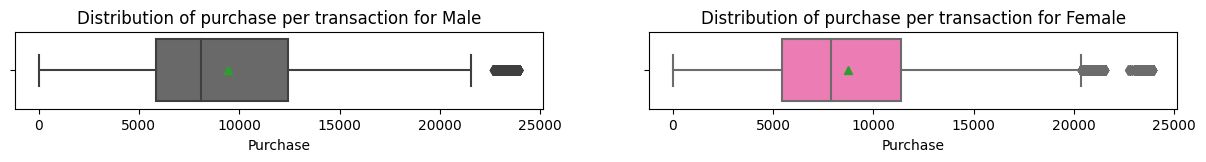

In [242]:
plt.figure(figsize = (15, 1))

plt.subplot(1, 2, 1)
plt.title('Distribution of purchase per transaction for Male')
sns.boxplot(data = w_male, x = 'Purchase', showmeans = True, color = 'dimgray')

plt.subplot(1, 2 ,2)
plt.title('Distribution of purchase per transaction for Female')
sns.boxplot(data = w_female, x = 'Purchase', showmeans = True, color = 'hotpink')

plt.show()

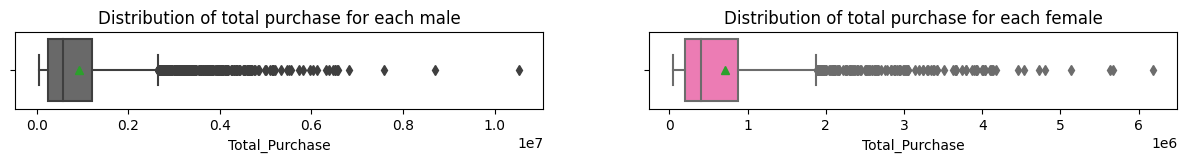

In [243]:
plt.figure(figsize = (15, 1))

plt.subplot(1, 2, 1)
plt.title('Distribution of total purchase for each male')
sns.boxplot(data = w_male_customer, x = 'Total_Purchase', showmeans = True, color = 'dimgray')

plt.subplot(1, 2 ,2)
plt.title('Distribution of total purchase for each female')
sns.boxplot(data = w_female_customer, x = 'Total_Purchase', showmeans = True, color = 'hotpink')

plt.show()

5. Distribution of Purchase Per Transaction by Age Group

In [244]:
w['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

[]

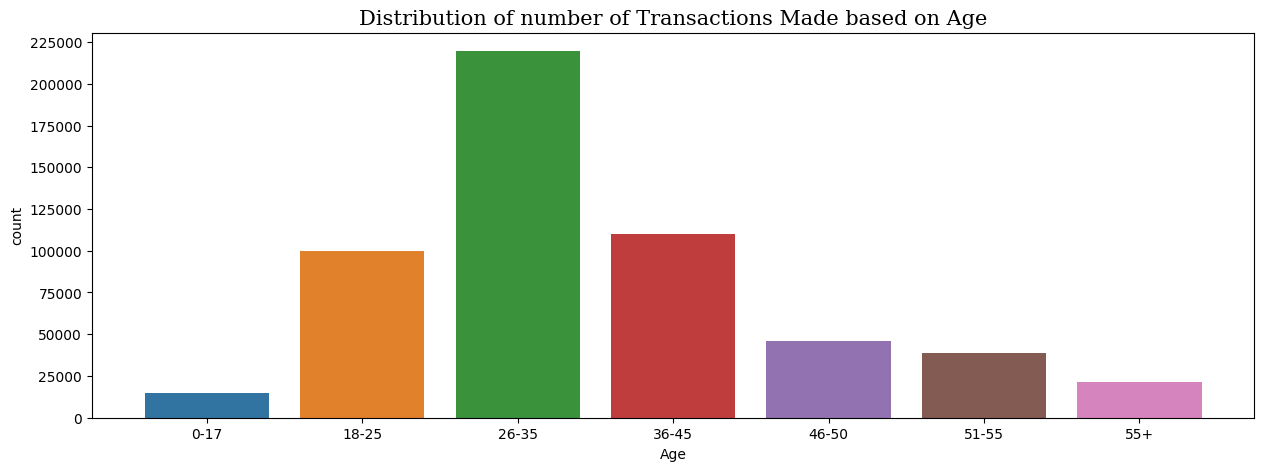

In [247]:
plt.figure(figsize = (15, 5))
plt.title('Distribution of number of Transactions Made based on Age',
          fontsize = 15, fontweight = 250, fontstyle = 'normal', fontfamily = 'serif')
plt.yticks(np.arange(0, 250001, 25000))
sns.countplot(data = w, x = 'Age',
              order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.plot()

6. Distribution of Purchase Per Transaction by Product_Category

[]

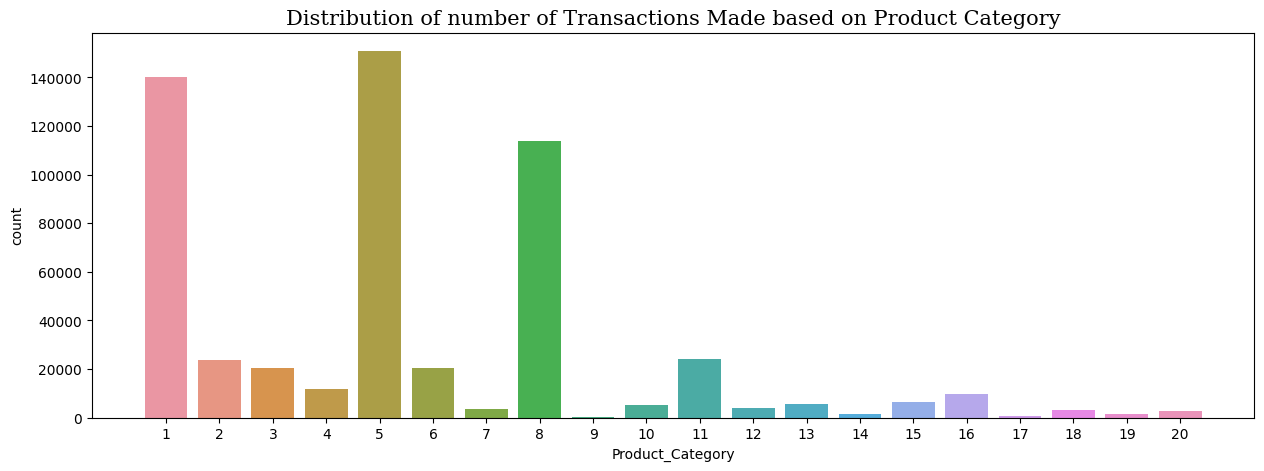

In [268]:
plt.figure(figsize = (15, 5))

plt.title('Distribution of number of Transactions Made based on Product Category',
          fontsize = 15, fontweight = 250, fontstyle = 'normal', fontfamily = 'serif')
sns.countplot(data = w, x = w['Product_Category'])
plt.plot()

7. Distribution of total purchase made for different Product Categories

In [264]:
w_product_category = w.groupby(by = 'Product_Category')['Purchase'].sum().to_frame().reset_index()
w_prod_c = w_product_category.sort_values(by = 'Purchase', ascending = False)
w_prod_c

,Product_Category,Purchase
0,1,1910013754
4,5,941835229
7,8,854318799
5,6,324150302
1,2,268516186
2,3,204084713
15,16,145120612
10,11,113791115
9,10,100837301
14,15,92969042


[]

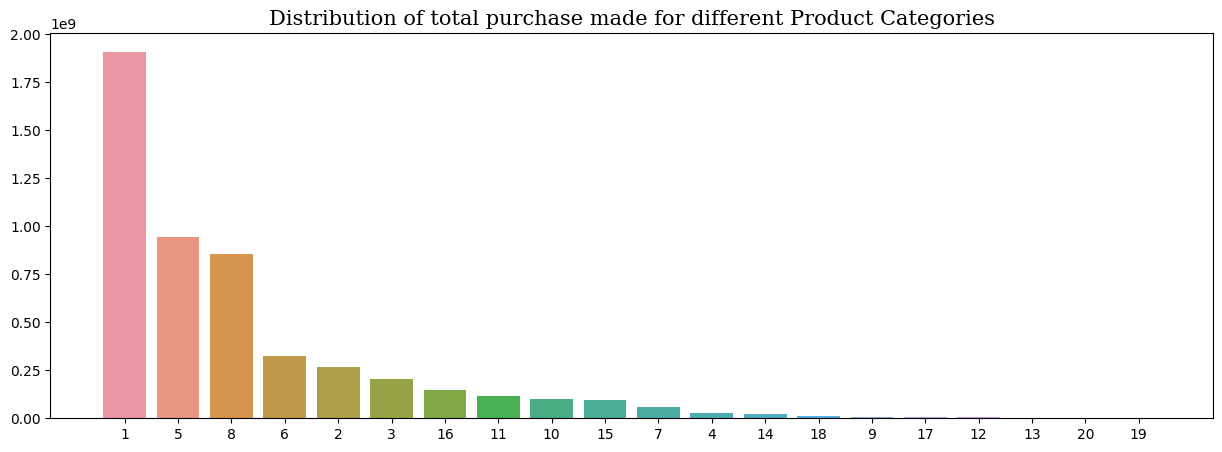

In [267]:
plt.figure(figsize = (15, 5))
plt.title('Distribution of total purchase made for different Product Categories',
          fontsize = 15,fontweight = 250, fontstyle = 'normal', fontfamily = 'serif')
sns.barplot(x = w_prod_c["Product_Category"].values, y = w_prod_c["Purchase"].values, order = w_prod_c["Product_Category"].values)
plt.plot()

8. Distribution of total purchase made based on Occupation

[]

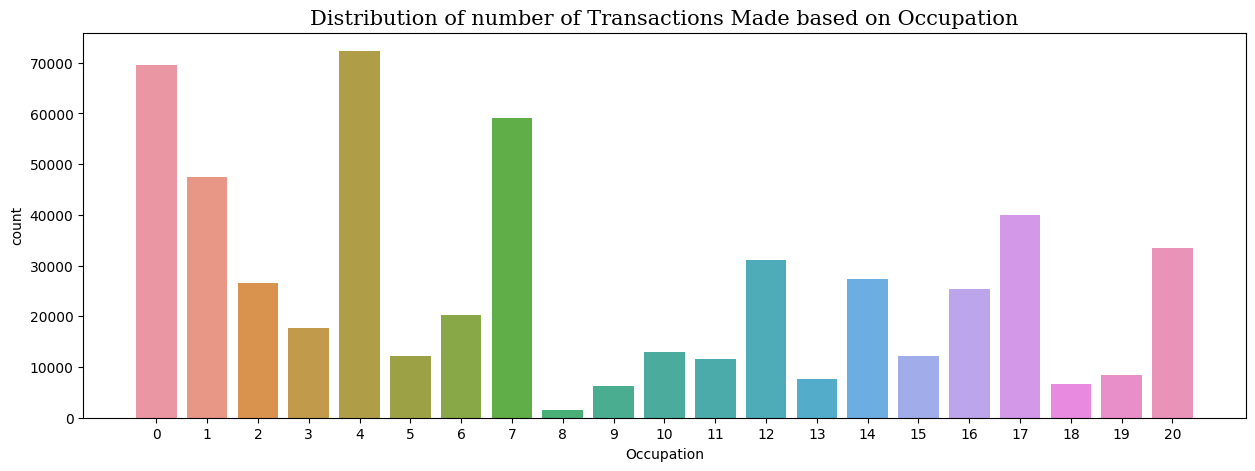

In [269]:
plt.figure(figsize = (15, 5))

plt.title('Distribution of number of Transactions Made based on Occupation',
          fontsize = 15, fontweight = 250, fontstyle = 'normal', fontfamily = 'serif')
sns.countplot(data = w, x = 'Occupation')
plt.plot()

9. Distribution of total purchase made by customers with different Occupations

In [272]:
w_occupation = w.groupby(by = 'Occupation')['Purchase'].sum().to_frame().reset_index()
w_occupation = w_occupation.sort_values(by = 'Purchase', ascending = False)
w_occupation

,Occupation,Purchase
4,4,666244484
0,0,635406958
7,7,557371587
1,1,424614144
17,17,393281453
12,12,305449446
20,20,296570442
14,14,259454692
16,16,238346955
2,2,238028583


[]

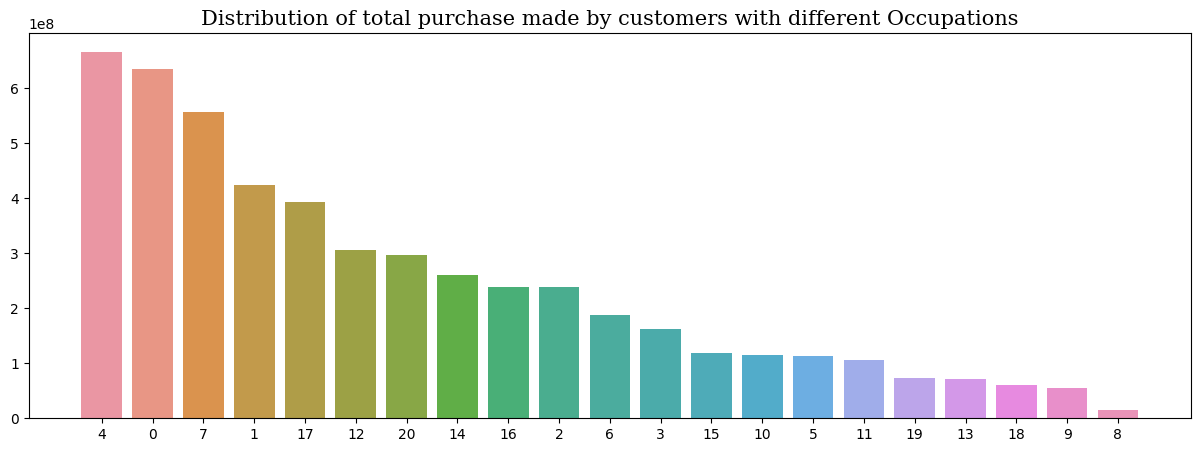

In [274]:
plt.figure(figsize = (15, 5))

plt.title('Distribution of total purchase made by customers with different Occupations',
          fontsize = 15,fontweight = 250, fontstyle = 'normal', fontfamily = 'serif')
sns.barplot(x = w_occupation["Occupation"].values, y = w_occupation["Purchase"].values, order = w_occupation["Occupation"].values)
plt.plot()

# **BIVARIATE ANALYSIS**

1. Age vs. Gender

[]

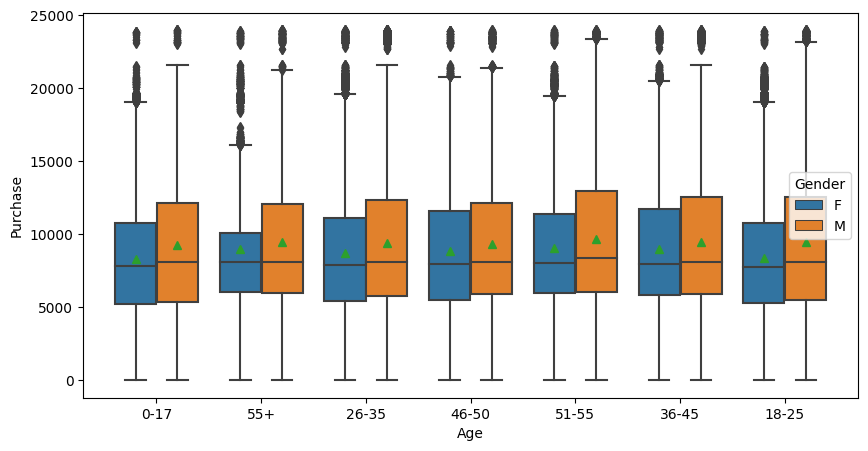

In [278]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = w, x = 'Age', y = 'Purchase', hue = 'Gender', showmeans = True)
plt.plot()

2. Marital_Status vs. Gender

[]

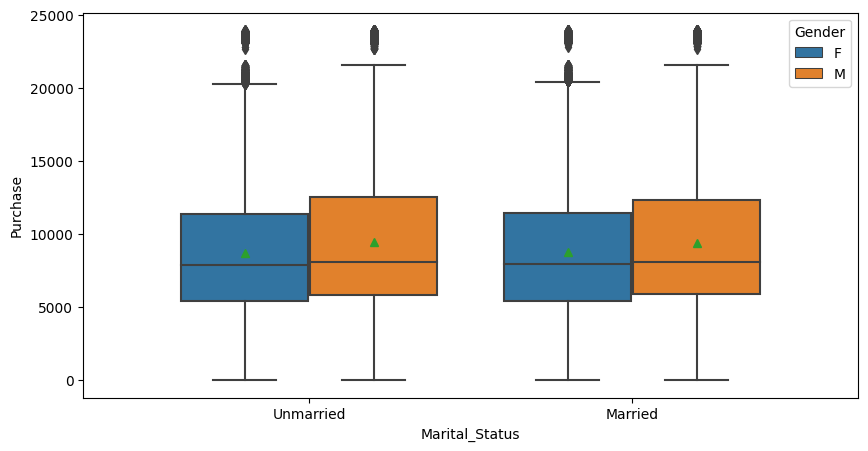

In [279]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = w, x = 'Marital_Status', y = 'Purchase', hue = 'Gender', showmeans = True)
plt.plot()

3. City_Category vs. Gender

[]

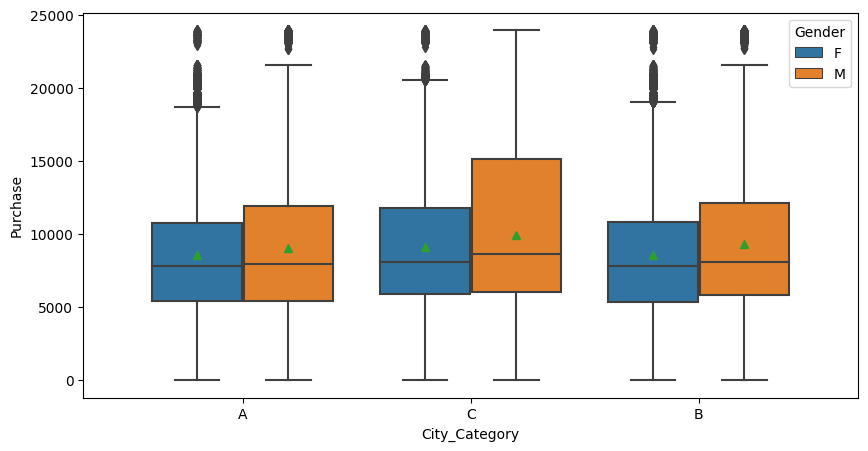

In [283]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = w, x = 'City_Category', y = 'Purchase', hue = 'Gender', showmeans = True)
plt.plot()

4. Stay_in_Current_City_Years vs. Gender

[]

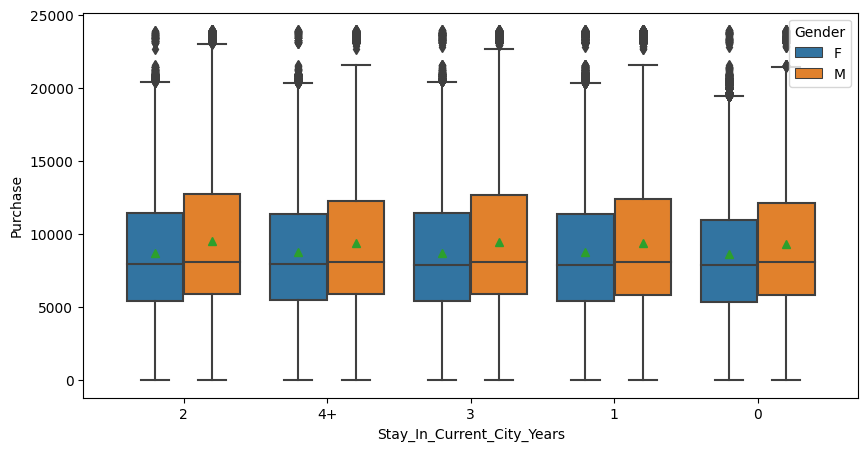

In [285]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = w, x = 'Stay_In_Current_City_Years', y = 'Purchase', hue = 'Gender', showmeans = True)
plt.plot()

# Determination of Average (Mean) Purchase by Each User

1. Male

In [286]:
w_male_customer

,Gender,User_ID,Total_Purchase
1666,M,1000002,810472
1667,M,1000003,341635
1668,M,1000004,206468
1669,M,1000005,821001
1670,M,1000007,234668
...,...,...,...
5886,M,1006030,737361
5887,M,1006032,517261
5888,M,1006033,501843
5889,M,1006034,197086


In [287]:
#The code snippet performs a loop to calculate the mean purchase for different.

#Sample size of Male

mean_purchases = []
for sample_size in range (50, 4000):
  sample_mean = w_male_customer["Total_Purchase"].sample(sample_size).mean()
  mean_purchases.append(sample_mean)

Behavior of mean purchases as the sample size increases

[]

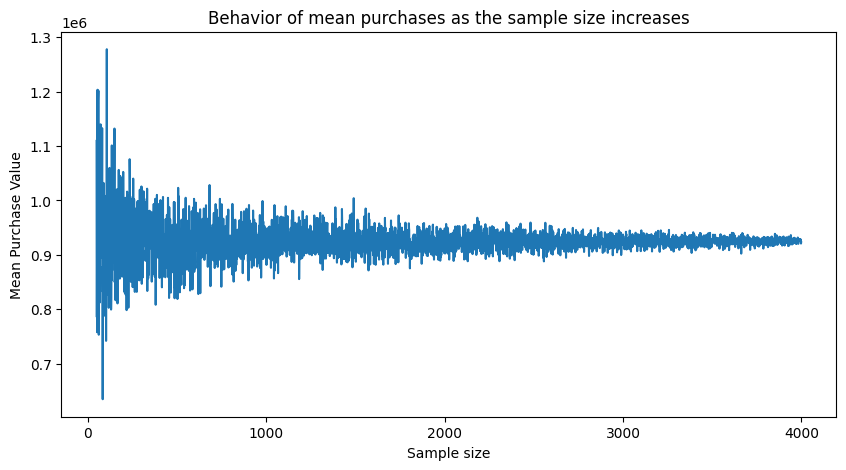

In [288]:
plt.figure(figsize = (10, 5))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 4000), mean_purchases)
plt.xticks(np.arange(0, 10001, 1000))
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

Finding the confidence interval of each male's total spending on the Black Friday

In [290]:
means_male = []
size = w_male_customer["Total_Purchase"].shape[0]
for boot_strapped_sample in range(10000):
  sample_mean = w_male_customer["Total_Purchase"].sample(size, replace = True).mean()
  means_male.append(sample_mean)

[]

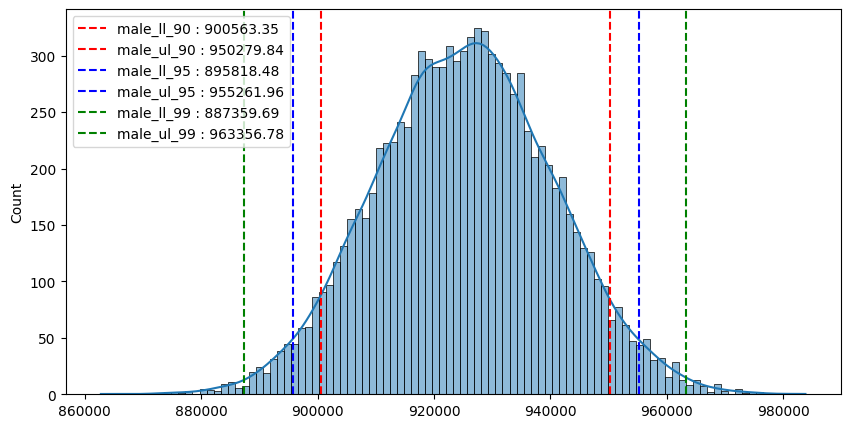

In [309]:
# The below code generates a histogram plot with kernel density estimation and
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (10, 5))
sns.histplot(means_male, kde = True, bins = 100)

# calculating the lower limit & upper limit of the 90% confidence interval
male_ll_90 = np.percentile(means_male, 5)
male_ul_90 = np.percentile(means_male, 95)

# calculating the lower limit & upper limit of the 95% confidence interval
male_ll_95 = np.percentile(means_male, 2.5)
male_ul_95 = np.percentile(means_male, 97.5)

# calculating the lower limit & upper limit of the 99% confidence interval
male_ll_99 = np.percentile(means_male, 0.5)
male_ul_99 = np.percentile(means_male, 99.5)


plt.axvline(male_ll_90, label = f'male_ll_90 : {round(male_ll_90, 2)}', linestyle = '--', color = 'red')
plt.axvline(male_ul_90, label = f'male_ul_90 : {round(male_ul_90, 2)}', linestyle = '--', color = 'red')

plt.axvline(male_ll_95, label = f'male_ll_95 : {round(male_ll_95, 2)}', linestyle = '--', color = 'blue')
plt.axvline(male_ul_95, label = f'male_ul_95 : {round(male_ul_95, 2)}', linestyle = '--', color = 'blue')

plt.axvline(male_ll_99, label = f'male_ll_99 : {round(male_ll_99, 2)}', linestyle = '--', color = 'green')
plt.axvline(male_ul_99, label = f'male_ul_99 : {round(male_ul_99, 2)}', linestyle = '--', color = 'green')

plt.legend()
plt.plot()

**Observation:**

Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by
each male customer on Black Friday at Walmart, despite having data for only 4225 male individuals. This provides us with a reasonable approximation of the range within which the total purchase of each male customer falls, with a certain level of confidence.

In [300]:
print(f"The population mean of total spending of each male will be approximately = {np.round(np.mean(means_male), 0)} ")

The population mean of total spending of each male will be approximately = 925299.0 


2. Male

In [301]:
w_female_customer

,Gender,User_ID,Total_Purchase
0,F,1000001,334093
1,F,1000006,379930
2,F,1000010,2169510
3,F,1000011,557023
4,F,1000016,150490
...,...,...,...
1661,F,1006035,956645
1662,F,1006036,4116058
1663,F,1006037,1119538
1664,F,1006038,90034


In [302]:
#The code snippet performs a loop to calculate the mean purchase for different.

#Sample size of Male

mean_purchases = []
for sample_size in range (50, 1600):
  sample_mean = w_male_customer["Total_Purchase"].sample(sample_size).mean()
  mean_purchases.append(sample_mean)

Behavior of mean purchases as the sample size increases

[]

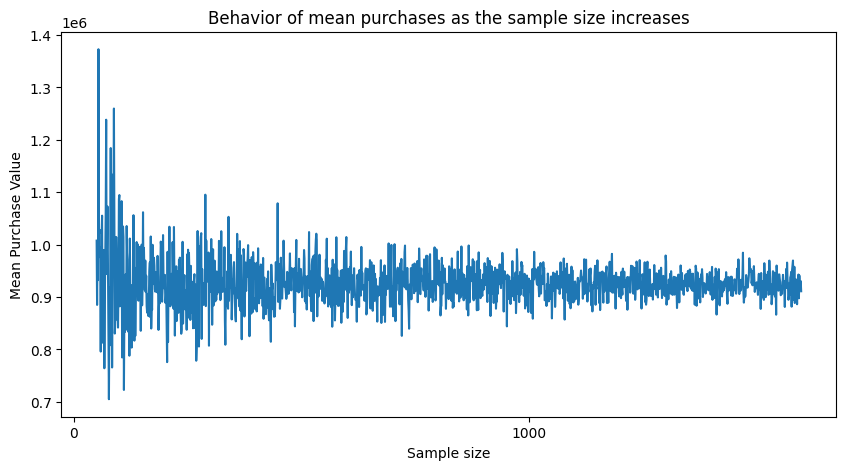

In [304]:
plt.figure(figsize = (10, 5))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 1600), mean_purchases)
plt.xticks(np.arange(0, 10001, 1000))
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

Finding the confidence interval of each female's total spending on the Black Friday

In [305]:
means_female = []
size = w_female_customer["Total_Purchase"].shape[0]
for boot_strapped_sample in range(10000):
  sample_mean = w_female_customer["Total_Purchase"].sample(size, replace = True).mean()
  means_female.append(sample_mean)

[]

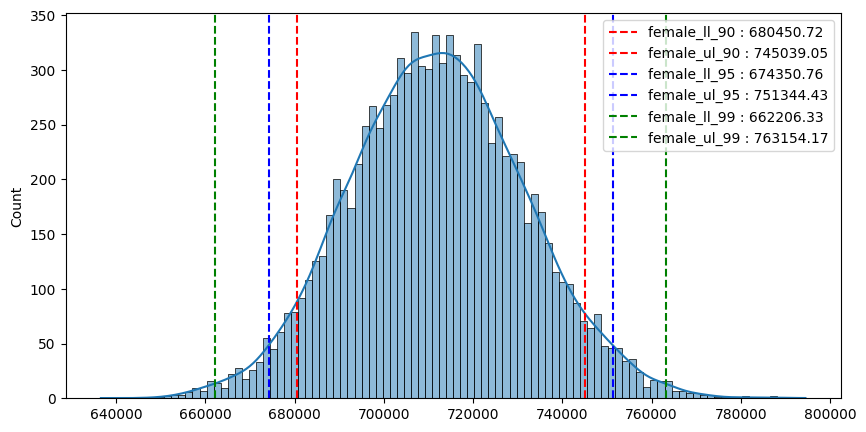

In [308]:
# The below code generates a histogram plot with kernel density estimation and
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (10, 5))
sns.histplot(means_female, kde = True, bins = 100)

# calculating the lower limit & upper limit of the 90% confidence interval
female_ll_90 = np.percentile(means_female, 5)
female_ul_90 = np.percentile(means_female, 95)

# calculating the lower limit & upper limit of the 95% confidence interval
female_ll_95 = np.percentile(means_female, 2.5)
female_ul_95 = np.percentile(means_female, 97.5)

# calculating the lower limit & upper limit of the 99% confidence interval
female_ll_99 = np.percentile(means_female, 0.5)
female_ul_99 = np.percentile(means_female, 99.5)


plt.axvline(female_ll_90, label = f'female_ll_90 : {round(female_ll_90, 2)}', linestyle = '--', color = 'red')
plt.axvline(female_ul_90, label = f'female_ul_90 : {round(female_ul_90, 2)}', linestyle = '--', color = 'red')

plt.axvline(female_ll_95, label = f'female_ll_95 : {round(female_ll_95, 2)}', linestyle = '--', color = 'blue')
plt.axvline(female_ul_95, label = f'female_ul_95 : {round(female_ul_95, 2)}', linestyle = '--', color = 'blue')

plt.axvline(female_ll_99, label = f'female_ll_99 : {round(female_ll_99, 2)}', linestyle = '--', color = 'green')
plt.axvline(female_ul_99, label = f'female_ul_99 : {round(female_ul_99, 2)}', linestyle = '--', color = 'green')

plt.legend()
plt.plot()

**Observation**:

Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each female customer on Black Friday at Walmart, despite having data for only 1666 female individuals. This provides us with a reasonable approximation of the range within which the total purchase of each female customer falls, with a certain level of confidence.

In [ ]:
print(f"The population mean of total spending of each female will be approximately = {np.round(np.mean(means_female), 0)} ")

# Comparison of distributions of Male's Total purchase amount and Female's Total purchase amount

[]

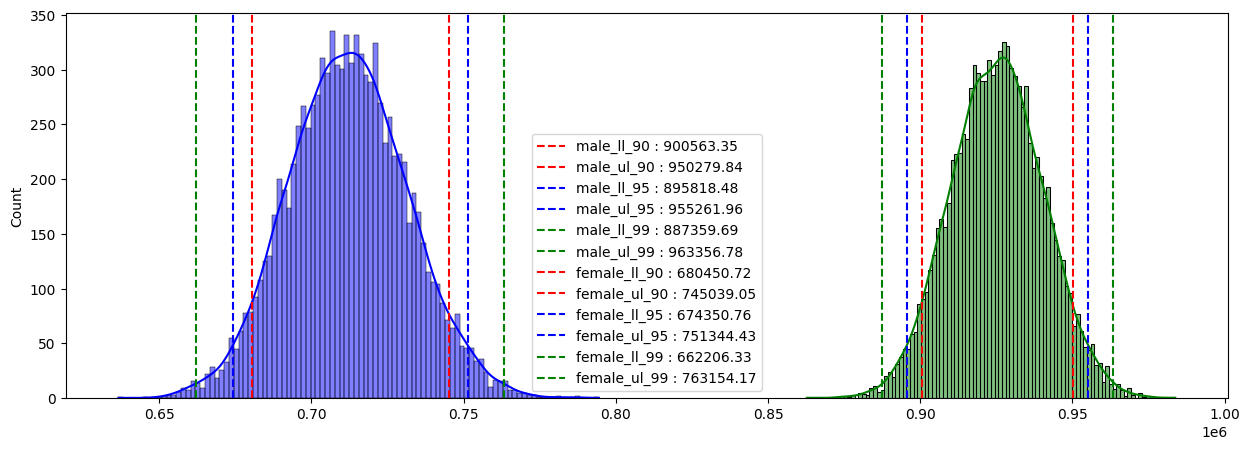

In [313]:
# The code generates a histogram plot to visualize the distributions of means_male and means_female,
    # along with vertical lines indicating confidence interval limits at different confidence levels

plt.figure(figsize = (15, 5))

sns.histplot(means_male, kde = True, bins = 100, color = 'green', legend = True)

plt.axvline(male_ll_90, label = f'male_ll_90 : {round(male_ll_90, 2)}', linestyle = '--', color = 'red')
plt.axvline(male_ul_90, label = f'male_ul_90 : {round(male_ul_90, 2)}', linestyle = '--', color = 'red')

plt.axvline(male_ll_95, label = f'male_ll_95 : {round(male_ll_95, 2)}', linestyle = '--', color = 'blue')
plt.axvline(male_ul_95, label = f'male_ul_95 : {round(male_ul_95, 2)}', linestyle = '--', color = 'blue')

plt.axvline(male_ll_99, label = f'male_ll_99 : {round(male_ll_99, 2)}', linestyle = '--', color = 'green')
plt.axvline(male_ul_99, label = f'male_ul_99 : {round(male_ul_99, 2)}', linestyle = '--', color = 'green')


sns.histplot(means_female, kde = True, bins = 100, color = 'blue', legend = True)

plt.axvline(female_ll_90, label = f'female_ll_90 : {round(female_ll_90, 2)}', linestyle = '--', color = 'red')
plt.axvline(female_ul_90, label = f'female_ul_90 : {round(female_ul_90, 2)}', linestyle = '--', color = 'red')

plt.axvline(female_ll_95, label = f'female_ll_95 : {round(female_ll_95, 2)}', linestyle = '--', color = 'blue')
plt.axvline(female_ul_95, label = f'female_ul_95 : {round(female_ul_95, 2)}', linestyle = '--', color = 'blue')

plt.axvline(female_ll_99, label = f'female_ll_99 : {round(female_ll_99, 2)}', linestyle = '--', color = 'green')
plt.axvline(female_ul_99, label = f'female_ul_99 : {round(female_ul_99, 2)}', linestyle = '--', color = 'green')

plt.legend()
plt.plot()

**Observations:**

It can be clearly seen from the above chart that the distribution of males' total purchase amount lies well towards the right of females' total purchase amount. We can conclude that, *on average, males tend to spend more on purchases compared to females*. This observation suggests a potential difference in spending behavior between genders.

There could be several reasons why males are spending more than females:

 **1. Product preferences**: Males may have a higher tendency to purchase products that are generally more expensive or fall into higher price categories. This could include items such as electronics, gadgets, or luxury goods.

 **2. Income disparity**: There may be an income disparity between males and females, with males having higher earning potential or occupying higher-paying job roles. This can lead to a difference in purchasing power and ability to spend more on products.

 **3. Consumption patterns**: Males might exhibit different consumption patterns, such as being more inclined towards hobbies or interests that require higher spending, such as sports equipment, gaming, or collectibles.

**4. Marketing and advertising targeting**: Advertisers and marketers may target males with products or services that are positioned at higher price points. This targeted marketing approach can influence purchasing decisions and contribute to males spending more.

It is highly important to note that these reasons are general observations and may not apply universally. Individual preferences, personal financial situations, and various other factors can also influence spending patterns.

# Determination of Average (Mean) purchase made by each user belonging to different Marital Status

In [315]:
w_unmarried = w.loc[w['Marital_Status'] == 'Unmarried']
w_married = w.loc[w['Marital_Status'] == 'Married']

In [316]:
w_unmarried = w_unmarried.groupby('User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
w_married = w_married.groupby('User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})

1. Unmarried

In [322]:
w_unmarried

,User_ID,Total_Purchase
0,1000001,334093
1,1000002,810472
2,1000003,341635
3,1000006,379930
4,1000009,594099
...,...,...
3412,1006034,197086
3413,1006035,956645
3414,1006037,1119538
3415,1006038,90034


How the deviations vary for different sample sizes?

In [323]:
mean_purchases = []
for sample_size in range(50, 3000):
    sample_mean = w_unmarried['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

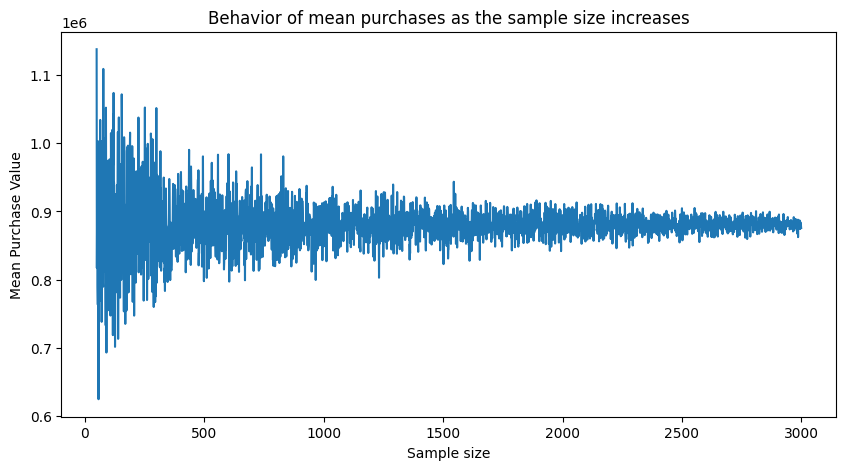

In [324]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases
    # as the sample size increases

plt.figure(figsize = (10, 5))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 3000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

Finding the confidence interval of each Unmarried customer's Total spending on the Black Friday

In [325]:
unmarried_means = []
size = w_unmarried['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = w_unmarried['Total_Purchase'].sample(size, replace = True).mean()
    unmarried_means.append(sample_mean)

[]

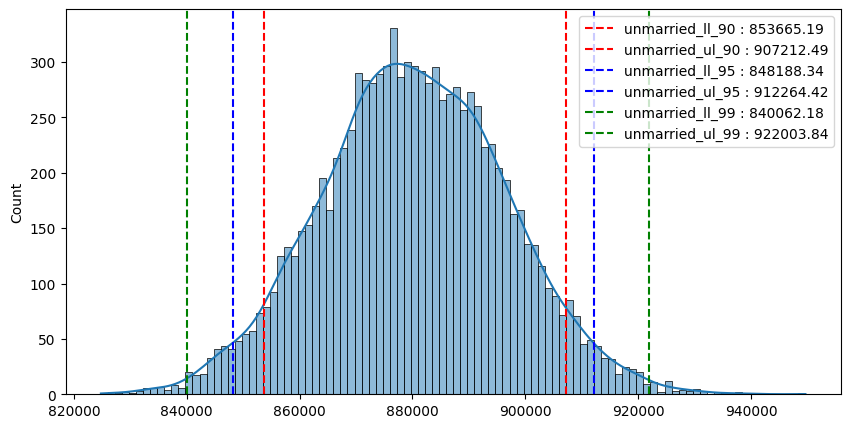

In [326]:
# The below code generates a histogram plot with kernel density estimation and
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (10, 5))
sns.histplot(unmarried_means, kde = True, bins = 100)

# calculating the lower limit & upper limit of the 90% confidence interval
unmarried_ll_90 = np.percentile(unmarried_means, 5)
unmarried_ul_90 = np.percentile(unmarried_means, 95)

# calculating the lower limit & upper limit of the 95% confidence interval
unmarried_ll_95 = np.percentile(unmarried_means, 2.5)
unmarried_ul_95 = np.percentile(unmarried_means, 97.5)

# calculating the lower limit & upper limit of the 99% confidence interval
unmarried_ll_99 = np.percentile(unmarried_means, 0.5)
unmarried_ul_99 = np.percentile(unmarried_means, 99.5)

plt.axvline(unmarried_ll_90, label = f'unmarried_ll_90 : {round(unmarried_ll_90, 2)}', linestyle = '--', color = 'red')
plt.axvline(unmarried_ul_90, label = f'unmarried_ul_90 : {round(unmarried_ul_90, 2)}', linestyle = '--', color = 'red')

plt.axvline(unmarried_ll_95, label = f'unmarried_ll_95 : {round(unmarried_ll_95, 2)}', linestyle = '--', color = 'blue')
plt.axvline(unmarried_ul_95, label = f'unmarried_ul_95 : {round(unmarried_ul_95, 2)}', linestyle = '--', color = 'blue')

plt.axvline(unmarried_ll_99, label = f'unmarried_ll_99 : {round(unmarried_ll_99, 2)}', linestyle = '--', color = 'green')
plt.axvline(unmarried_ul_99, label = f'unmarried_ul_99 : {round(unmarried_ul_99, 2)}', linestyle = '--', color = 'green')

plt.legend()
plt.plot()

**Observation**:

Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each Unmarried customer on Black Friday at Walmart, despite having data for only 3417 individuals having Unmarried as marital status. This provides us with a reasonable approximation of the range within which the total purchase of each Unmarried customer falls, with a certain level of confidence.

In [328]:
print(f"The population mean of total spending of each Unmarried customer  will be approximately = {np.round(np.mean(unmarried_means), 2)}")

The population mean of total spending of each Unmarried customer  will be approximately = 880277.86


2. Married

In [329]:
w_married

,User_ID,Total_Purchase
0,1000004,206468
1,1000005,821001
2,1000007,234668
3,1000008,796593
4,1000010,2169510
...,...,...
2469,1006029,157436
2470,1006030,737361
2471,1006033,501843
2472,1006036,4116058


How the deviations vary for different sample sizes?

In [330]:
mean_purchases = []
for sample_size in range(50, 2000):
    sample_mean = w_married['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

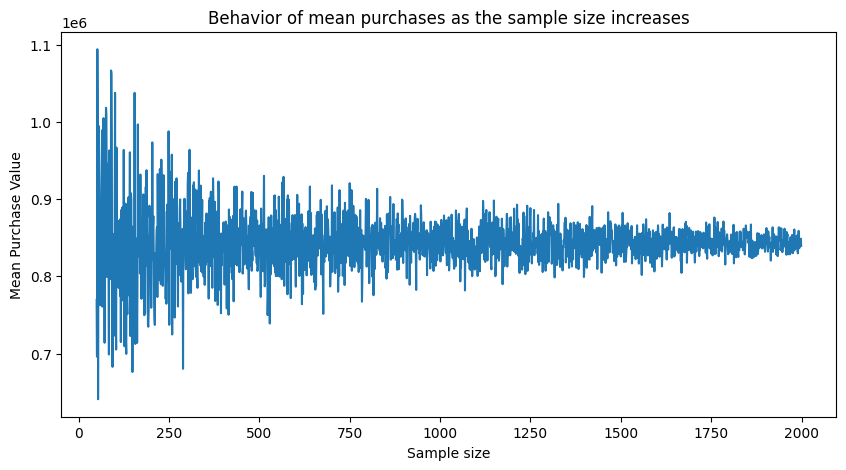

In [332]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases
    # as the sample size increases

plt.figure(figsize = (10, 5))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 2000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

Finding the confidence interval of each Married customer's Total spending on the Black Friday

In [333]:
married_means = []
size = w_married['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = w_married['Total_Purchase'].sample(size, replace = True).mean()
    married_means.append(sample_mean)

[]

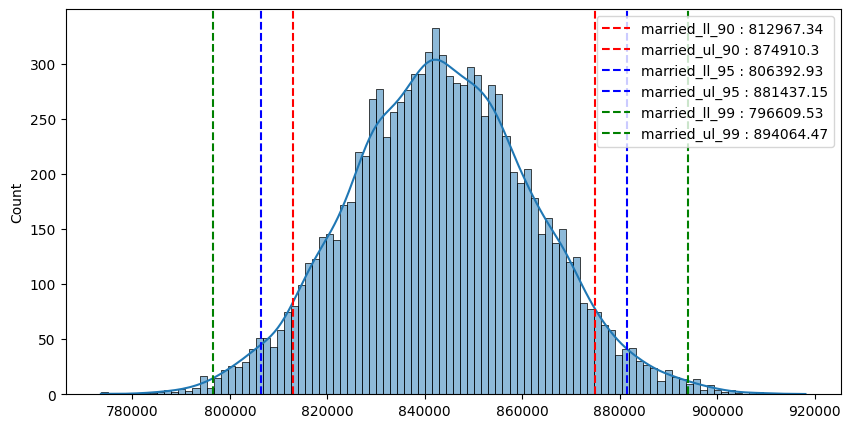

In [335]:
# The below code generates a histogram plot with kernel density estimation and
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (10, 5))
sns.histplot(married_means, kde = True, bins = 100)

# calculating the lower limit & upper limit of the 90% confidence interval
married_ll_90 = np.percentile(married_means, 5)
married_ul_90 = np.percentile(married_means, 95)

# calculating the lower limit & upper limit of the 95% confidence interval
married_ll_95 = np.percentile(married_means, 2.5)
married_ul_95 = np.percentile(married_means, 97.5)

# calculating the lower limit & upper limit of the 99% confidence interval
married_ll_99 = np.percentile(married_means, 0.5)
married_ul_99 = np.percentile(married_means, 99.5)

plt.axvline(married_ll_90, label = f'married_ll_90 : {round(married_ll_90, 2)}', linestyle = '--', color = 'red')
plt.axvline(married_ul_90, label = f'married_ul_90 : {round(married_ul_90, 2)}', linestyle = '--', color = 'red')

plt.axvline(married_ll_95, label = f'married_ll_95 : {round(married_ll_95, 2)}', linestyle = '--', color = 'blue')
plt.axvline(married_ul_95, label = f'married_ul_95 : {round(married_ul_95, 2)}', linestyle = '--', color = 'blue')

plt.axvline(married_ll_99, label = f'married_ll_99 : {round(married_ll_99, 2)}', linestyle = '--', color = 'green')
plt.axvline(married_ul_99, label = f'married_ul_99 : {round(married_ul_99, 2)}', linestyle = '--', color = 'green')

plt.legend()
plt.plot()

**Observation**:

Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each married customer on Black Friday at Walmart, despite having data for only 2474 individuals having married as marital status. This provides us with a reasonable approximation of the range within which the total purchase of each married customer falls, with a certain level of confidence.

In [337]:
print(f"The population mean of total spending of each Married customer will be approximately = {np.round(np.mean(married_means), 2)} ")

The population mean of total spending of each Married customer will be approximately = 843582.04 


# Comparison of distributions of Married Customer's Total purchase amount and Unmarried Customer's Total purchase amount

[]

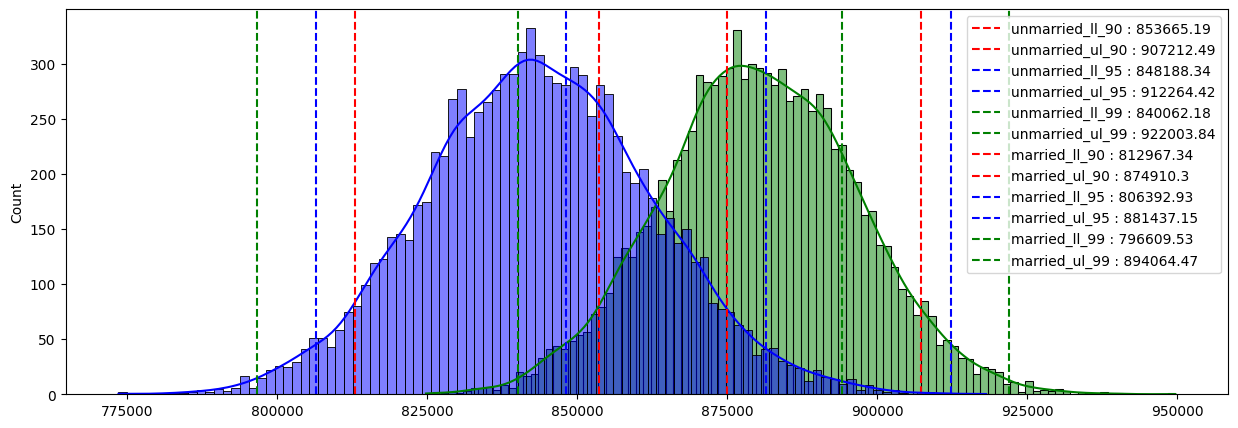

In [338]:
# The code generates a histogram plot to visualize the distributions of means_male and means_female,
    # along with vertical lines indicating confidence interval limits at different confidence levels

plt.figure(figsize = (15, 5))

sns.histplot(unmarried_means, kde = True, bins = 100, color = 'green', legend = True)

plt.axvline(unmarried_ll_90, label = f'unmarried_ll_90 : {round(unmarried_ll_90, 2)}', linestyle = '--', color = 'red')
plt.axvline(unmarried_ul_90, label = f'unmarried_ul_90 : {round(unmarried_ul_90, 2)}', linestyle = '--', color = 'red')

plt.axvline(unmarried_ll_95, label = f'unmarried_ll_95 : {round(unmarried_ll_95, 2)}', linestyle = '--', color = 'blue')
plt.axvline(unmarried_ul_95, label = f'unmarried_ul_95 : {round(unmarried_ul_95, 2)}', linestyle = '--', color = 'blue')

plt.axvline(unmarried_ll_99, label = f'unmarried_ll_99 : {round(unmarried_ll_99, 2)}', linestyle = '--', color = 'green')
plt.axvline(unmarried_ul_99, label = f'unmarried_ul_99 : {round(unmarried_ul_99, 2)}', linestyle = '--', color = 'green')


sns.histplot(married_means, kde = True, bins = 100, color = 'blue', legend = True)

plt.axvline(married_ll_90, label = f'married_ll_90 : {round(married_ll_90, 2)}', linestyle = '--', color = 'red')
plt.axvline(married_ul_90, label = f'married_ul_90 : {round(married_ul_90, 2)}', linestyle = '--', color = 'red')

plt.axvline(married_ll_95, label = f'married_ll_95 : {round(married_ll_95, 2)}', linestyle = '--', color = 'blue')
plt.axvline(married_ul_95, label = f'married_ul_95 : {round(married_ul_95, 2)}', linestyle = '--', color = 'blue')

plt.axvline(married_ll_99, label = f'married_ll_99 : {round(married_ll_99, 2)}', linestyle = '--', color = 'green')
plt.axvline(married_ul_99, label = f'married_ul_99 : {round(married_ul_99, 2)}', linestyle = '--', color = 'green')

plt.legend()
plt.plot()

**Observations:**

It can be inferred from the above chart that the distributions of Unmarried Customers' total spending and Married customers' total spending overlap. It suggests that there is no significant difference in spending habits between these two groups. Here are some possible inferences that can be drawn from this:

**1. Relationship status does not strongly influence spending**: Being single or married does not appear to have a substantial impact on individuals' spending patterns. Other factors such as income, personal preferences, and financial priorities may play a more significant role in determining spending habits.

**2. Similar consumption patterns**: Singles and married individuals may have similar lifestyles and consumption patterns, leading to comparable spending behaviors. They may allocate their income in comparable ways, making similar purchasing decisions and spending on similar categories of products or services.

**3. Financial considerations**: Both singles and married individuals may have similar financial responsibilities and constraints, leading to similar spending levels. They may have similar obligations such as housing costs, bills, and other financial commitments, which influence their overall spending capacity.

**4. Individual differences outweigh relationship status**: Other individual characteristics, such as personal values, interests, and financial habits, may have a more significant impact on spending behavior than relationship status. These factors can vary widely within each group, resulting in overlapping spending distributions.

# Determination of Average (Mean) purchase made by each user based on their Age Groups:

In [339]:
w["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [340]:
w_age_0_to_17 = w.loc[w['Age'] == '0-17']
w_age_18_to_25 = w.loc[w['Age'] == '18-25']
w_age_26_to_35 = w.loc[w['Age'] == '26-35']
w_age_36_to_45 = w.loc[w['Age'] == '36-45']
w_age_46_to_50 = w.loc[w['Age'] == '46-50']
w_age_51_to_55 = w.loc[w['Age'] == '51-55']
w_age_above_55 = w.loc[w['Age'] == '55+']

In [341]:
w_age_0_to_17 = w_age_0_to_17.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
w_age_18_to_25 = w_age_18_to_25.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
w_age_26_to_35 = w_age_26_to_35.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
w_age_36_to_45 = w_age_36_to_45.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
w_age_46_to_50 = w_age_46_to_50.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
w_age_51_to_55 = w_age_51_to_55.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
w_age_above_55 = w_age_above_55.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})

1. Age Group 0-17 Years

In [342]:
w_age_0_to_17

,User_ID,Total_Purchase
0,1000001,334093
1,1000019,1458069
2,1000051,200772
3,1000075,1035584
4,1000086,294063
...,...,...
213,1005844,476231
214,1005953,629161
215,1005973,270475
216,1005989,466195


How the deviations vary for different sample sizes?

In [344]:
# The code snippet performs a loop to calculate the mean purchase for different
    # sample sizes of customers with age group 0 - 17 yrs.

mean_purchases = []
for sample_size in range(50, 200):
    sample_mean = w_age_0_to_17['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

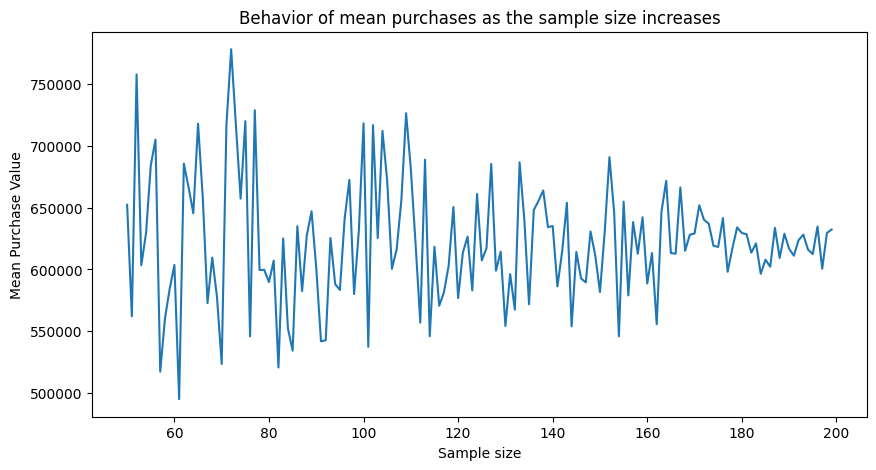

In [346]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases
    # as the sample size increases

plt.figure(figsize = (10, 5))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 200), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

Finding the confidence interval of total spending for each individual in the age group 0 - 17 on the Black Friday

In [359]:
means_a1 = []
size = w_age_0_to_17['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = w_age_0_to_17['Total_Purchase'].sample(size, replace = True).mean()
    means_a1.append(sample_mean)

[]

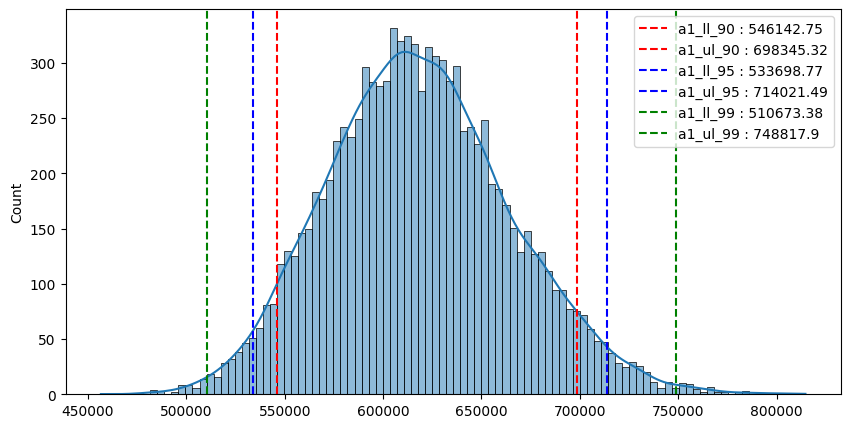

In [351]:
# The below code generates a histogram plot with kernel density estimation and
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (10, 5))
sns.histplot(means_a1, kde = True, bins = 100)

# calculating the lower limit & upper limit of the 90% confidence interval
a1_ll_90 = np.percentile(means_a1, 5)
a1_ul_90 = np.percentile(means_a1, 95)

# calculating the lower limit & upper limit of the 95% confidence interval
a1_ll_95 = np.percentile(means_a1, 2.5)
a1_ul_95 = np.percentile(means_a1, 97.5)

# calculating the lower limit & upper limit of the 99% confidence interval
a1_ll_99 = np.percentile(means_a1, 0.5)
a1_ul_99 = np.percentile(means_a1, 99.5)

plt.axvline(a1_ll_90, label = f'a1_ll_90 : {round(a1_ll_90, 2)}', linestyle = '--', color = 'red')
plt.axvline(a1_ul_90, label = f'a1_ul_90 : {round(a1_ul_90, 2)}', linestyle = '--', color = 'red')

plt.axvline(a1_ll_95, label = f'a1_ll_95 : {round(a1_ll_95, 2)}', linestyle = '--', color = 'blue')
plt.axvline(a1_ul_95, label = f'a1_ul_95 : {round(a1_ul_95, 2)}', linestyle = '--', color = 'blue')

plt.axvline(a1_ll_99, label = f'a1_ll_99 : {round(a1_ll_99, 2)}', linestyle = '--', color = 'green')
plt.axvline(a1_ul_99, label = f'a1_ul_99 : {round(a1_ul_99, 2)}', linestyle = '--', color = 'green')

plt.legend()
plt.plot()

**Observation**:

Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 0 - 17 years on Black Friday at Walmart, despite having data for only 218 individuals having age group 0 - 17 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 0 - 17 years falls, with a certain level of confidence.

In [352]:
print(f"The population mean of total spending of each customer in age group 0 -17 will be approximately = {np.round(np.mean(means_a1), 2)} ")

The population mean of total spending of each customer in age group 0 -17 will be approximately = 618550.49 


2. Age Group 18-25 years

In [353]:
w_age_18_to_25

,User_ID,Total_Purchase
0,1000018,1979047
1,1000021,127099
2,1000022,1279914
3,1000025,534706
4,1000034,807983
...,...,...
1064,1005998,702901
1065,1006008,266306
1066,1006027,265201
1067,1006028,362972


How the deviations vary for different sample sizes?

In [354]:
# The code snippet performs a loop to calculate the mean purchase for different
    # sample sizes of customers with age group 18 - 25 yrs.

mean_purchases = []
for sample_size in range(50, 1000):
    sample_mean = w_age_18_to_25['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

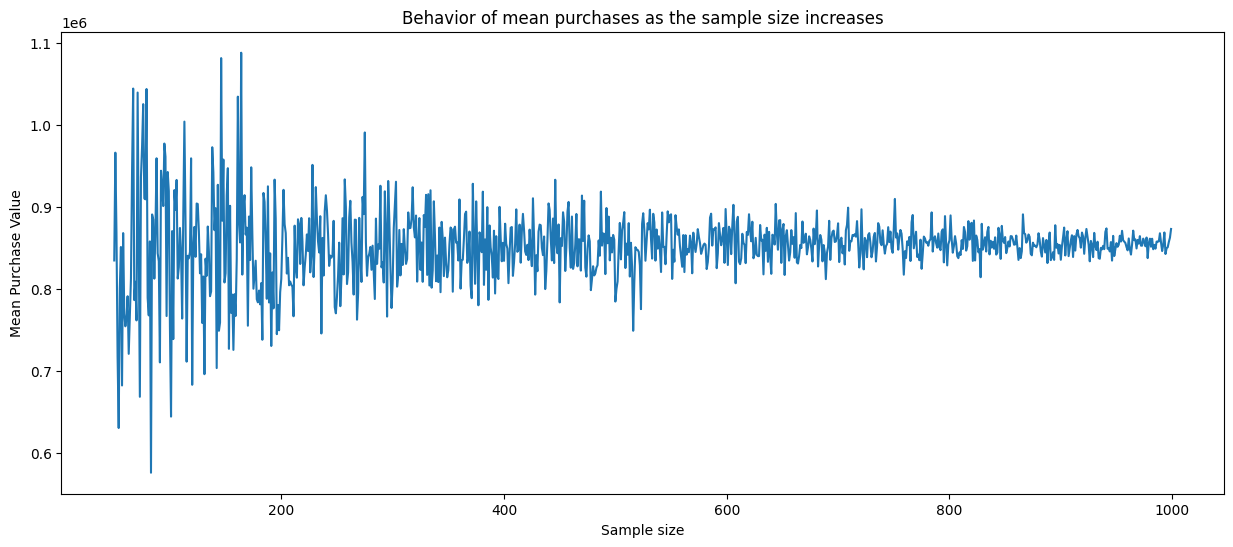

In [355]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases
    # as the sample size increases

plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 1000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

Finding the confidence interval of total spending for each individual in the age group 18 - 25 on the Black Friday

In [360]:
means_a2 = []
size = w_age_18_to_25['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = w_age_18_to_25['Total_Purchase'].sample(size, replace = True).mean()
    means_a2.append(sample_mean)

[]

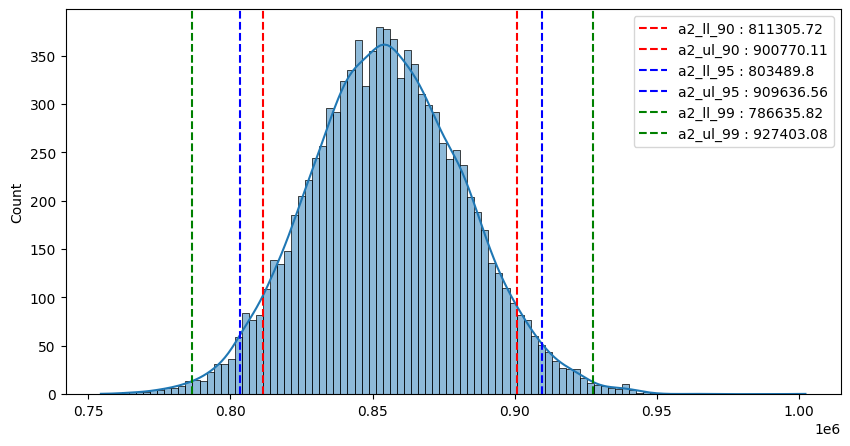

In [362]:
# The below code generates a histogram plot with kernel density estimation and
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (10, 5))
sns.histplot(means_a2, kde = True, bins = 100)

# calculating the lower limit & upper limit of the 90% confidence interval
a2_ll_90 = np.percentile(means_a2, 5)
a2_ul_90 = np.percentile(means_a2, 95)

# calculating the lower limit & upper limit of the 95% confidence interval
a2_ll_95 = np.percentile(means_a2, 2.5)
a2_ul_95 = np.percentile(means_a2, 97.5)

# calculating the lower limit & upper limit of the 99% confidence interval
a2_ll_99 = np.percentile(means_a2, 0.5)
a2_ul_99 = np.percentile(means_a2, 99.5)

plt.axvline(a2_ll_90, label = f'a2_ll_90 : {round(a2_ll_90, 2)}', linestyle = '--', color = 'red')
plt.axvline(a2_ul_90, label = f'a2_ul_90 : {round(a2_ul_90, 2)}', linestyle = '--', color = 'red')

plt.axvline(a2_ll_95, label = f'a2_ll_95 : {round(a2_ll_95, 2)}', linestyle = '--', color = 'blue')
plt.axvline(a2_ul_95, label = f'a2_ul_95 : {round(a2_ul_95, 2)}', linestyle = '--', color = 'blue')

plt.axvline(a2_ll_99, label = f'a2_ll_99 : {round(a2_ll_99, 2)}', linestyle = '--', color = 'green')
plt.axvline(a2_ul_99, label = f'a2_ul_99 : {round(a2_ul_99, 2)}', linestyle = '--', color = 'green')

plt.legend()
plt.plot()

**Observation**:

Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 18 - 25 years on Black Friday at Walmart, despite having data for only 1069 individuals having age group 18 - 25 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 18 - 25 years falls, with a certain level of confidence.

In [363]:
print(f"The population mean of total spending of each customer in age group 18-25 will be approximately = {np.round(np.mean(means_a2), 2)} ")

The population mean of total spending of each customer in age group 18-25 will be approximately = 855332.13 


3. For Age Group 26-35 years


In [364]:
w_age_26_to_35

,User_ID,Total_Purchase
0,1000003,341635
1,1000005,821001
2,1000008,796593
3,1000009,594099
4,1000011,557023
...,...,...
2048,1006030,737361
2049,1006034,197086
2050,1006035,956645
2051,1006036,4116058


How the deviations vary for different sample sizes ?

In [366]:
# The code snippet performs a loop to calculate the mean purchase for different
    # sample sizes of customers with age group 26 - 35 yrs.

mean_purchases = []
for sample_size in range(50, 2000):
    sample_mean = w_age_26_to_35['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

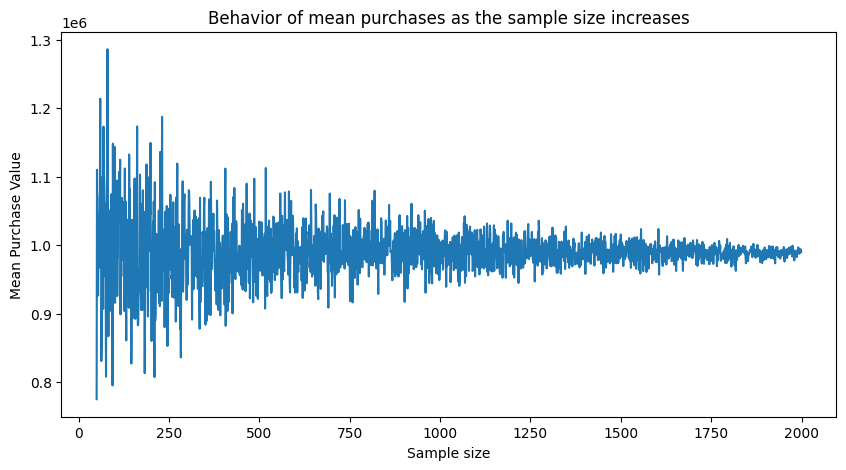

In [367]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases
    # as the sample size increases

plt.figure(figsize = (10, 5))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 2000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

Finding the confidence interval of total spending for each individual in the age group 26-35 on the Black Friday

In [369]:
means_a3 = []
size = w_age_26_to_35['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = w_age_26_to_35['Total_Purchase'].sample(size, replace = True).mean()
    means_a3.append(sample_mean)

[]

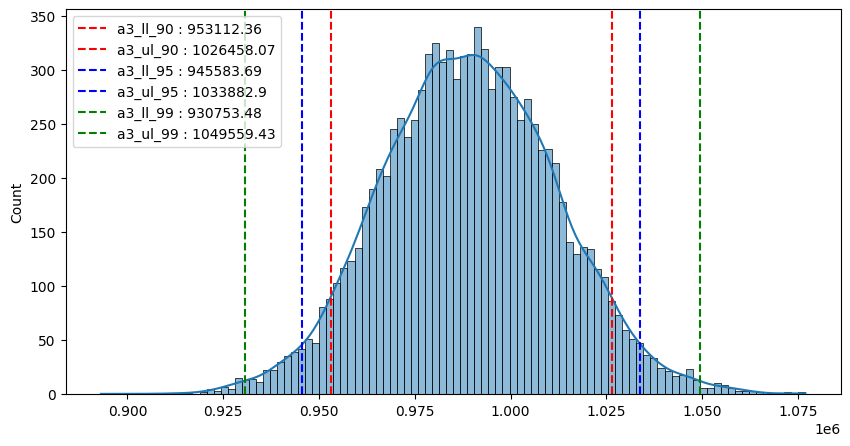

In [370]:
# The below code generates a histogram plot with kernel density estimation and
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (10, 5))
sns.histplot(means_a3, kde = True, bins = 100)

# calculating the lower limit & upper limit of the 90% confidence interval
a3_ll_90 = np.percentile(means_a3, 5)
a3_ul_90 = np.percentile(means_a3, 95)

# calculating the lower limit & upper limit of the 95% confidence interval
a3_ll_95 = np.percentile(means_a3, 2.5)
a3_ul_95 = np.percentile(means_a3, 97.5)

# calculating the lower limit & upper limit of the 99% confidence interval
a3_ll_99 = np.percentile(means_a3, 0.5)
a3_ul_99 = np.percentile(means_a3, 99.5)

plt.axvline(a3_ll_90, label = f'a3_ll_90 : {round(a3_ll_90, 2)}', linestyle = '--', color = 'red')
plt.axvline(a3_ul_90, label = f'a3_ul_90 : {round(a3_ul_90, 2)}', linestyle = '--', color = 'red')

plt.axvline(a3_ll_95, label = f'a3_ll_95 : {round(a3_ll_95, 2)}', linestyle = '--', color = 'blue')
plt.axvline(a3_ul_95, label = f'a3_ul_95 : {round(a3_ul_95, 2)}', linestyle = '--', color = 'blue')

plt.axvline(a3_ll_99, label = f'a3_ll_99 : {round(a3_ll_99, 2)}', linestyle = '--', color = 'green')
plt.axvline(a3_ul_99, label = f'a3_ul_99 : {round(a3_ul_99, 2)}', linestyle = '--', color = 'green')

plt.legend()
plt.plot()

**Observation**:

Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 26 - 35 years on Black Friday at Walmart, despite having data for only 2053 individuals having age group 26 - 35 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 26 - 35 years falls, with a certain level of confidence.

In [371]:
print(f"The population mean of total spending of each customer in age group 26-35 will be approximately = {np.round(np.mean(means_a3), 2)} ")

The population mean of total spending of each customer in age group 26-35 will be approximately = 989326.25 


4. For Age Group 36-45 years

In [372]:
w_age_36_to_45

,User_ID,Total_Purchase
0,1000007,234668
1,1000010,2169510
2,1000014,127629
3,1000016,150490
4,1000023,1670998
...,...,...
1162,1006011,1198714
1163,1006012,127920
1164,1006017,160230
1165,1006018,975585


How the deviations vary for different sample sizes?

In [373]:
# The code snippet performs a loop to calculate the mean purchase for different
    # sample sizes of customers with age group 36 - 45 yrs.

mean_purchases = []
for sample_size in range(50, 1000):
    sample_mean = w_age_36_to_45['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

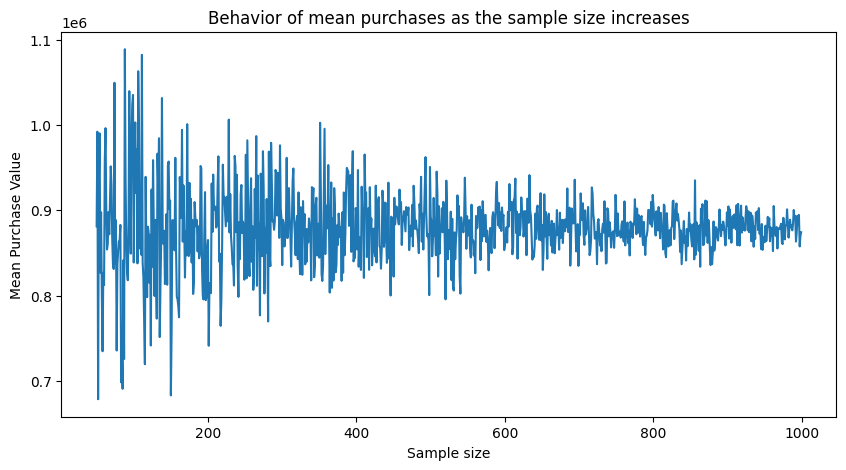

In [375]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases
    # as the sample size increases

plt.figure(figsize = (10, 5))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 1000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

Finding the confidence interval of total spending for each individual in the age group 36-45 on the Black Friday

In [376]:
means_a4 = []
size = w_age_36_to_45['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = w_age_36_to_45['Total_Purchase'].sample(size, replace = True).mean()
    means_a4.append(sample_mean)

[]

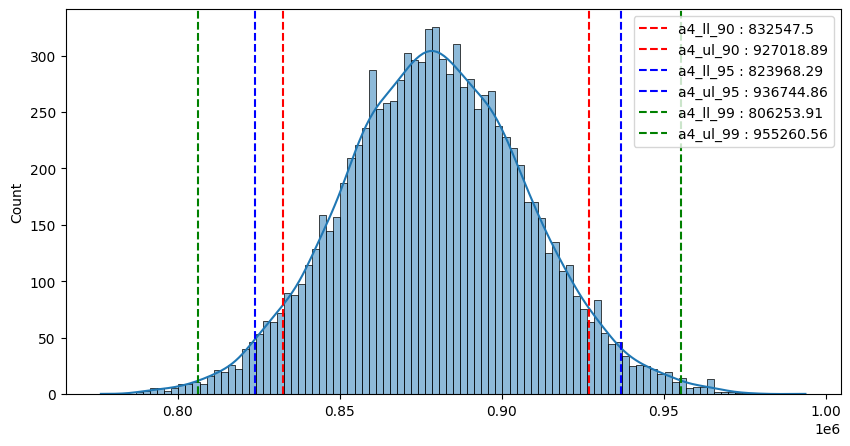

In [377]:
# The below code generates a histogram plot with kernel density estimation and
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (10, 5))
sns.histplot(means_a4, kde = True, bins = 100)

# calculating the lower limit & upper limit of the 90% confidence interval
a4_ll_90 = np.percentile(means_a4, 5)
a4_ul_90 = np.percentile(means_a4, 95)

# calculating the lower limit & upper limit of the 95% confidence interval
a4_ll_95 = np.percentile(means_a4, 2.5)
a4_ul_95 = np.percentile(means_a4, 97.5)

# calculating the lower limit & upper limit of the 99% confidence interval
a4_ll_99 = np.percentile(means_a4, 0.5)
a4_ul_99 = np.percentile(means_a4, 99.5)

plt.axvline(a4_ll_90, label = f'a4_ll_90 : {round(a4_ll_90, 2)}', linestyle = '--', color = 'red')
plt.axvline(a4_ul_90, label = f'a4_ul_90 : {round(a4_ul_90, 2)}', linestyle = '--', color = 'red')

plt.axvline(a4_ll_95, label = f'a4_ll_95 : {round(a4_ll_95, 2)}', linestyle = '--', color = 'blue')
plt.axvline(a4_ul_95, label = f'a4_ul_95 : {round(a4_ul_95, 2)}', linestyle = '--', color = 'blue')

plt.axvline(a4_ll_99, label = f'a4_ll_99 : {round(a4_ll_99, 2)}', linestyle = '--', color = 'green')
plt.axvline(a4_ul_99, label = f'a4_ul_99 : {round(a4_ul_99, 2)}', linestyle = '--', color = 'green')

plt.legend()
plt.plot()

**Observation**:

Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 36 - 45 years on Black Friday at Walmart, despite having data for only 1167 individuals having age group 36 - 45 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 36 - 45 years falls, with a certain level of confidence.

In [378]:
print(f"The population mean of total spending of each customer in age group 36-45 will be approximately = {np.round(np.mean(means_a4), 2)} ")

The population mean of total spending of each customer in age group 36-45 will be approximately = 879498.4 


5. For Age Group 46-50 years

In [379]:
w_age_46_to_50

,User_ID,Total_Purchase
0,1000004,206468
1,1000013,713927
2,1000033,1940418
3,1000035,821303
4,1000044,1180380
...,...,...
526,1006014,528238
527,1006016,3770970
528,1006032,517261
529,1006037,1119538


How the deviations vary for different sample sizes?

In [380]:
# The code snippet performs a loop to calculate the mean purchase for different
    # sample sizes of customers with age group 46 - 50 yrs.

mean_purchases = []
for sample_size in range(50, 500):
    sample_mean = w_age_46_to_50['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

[]

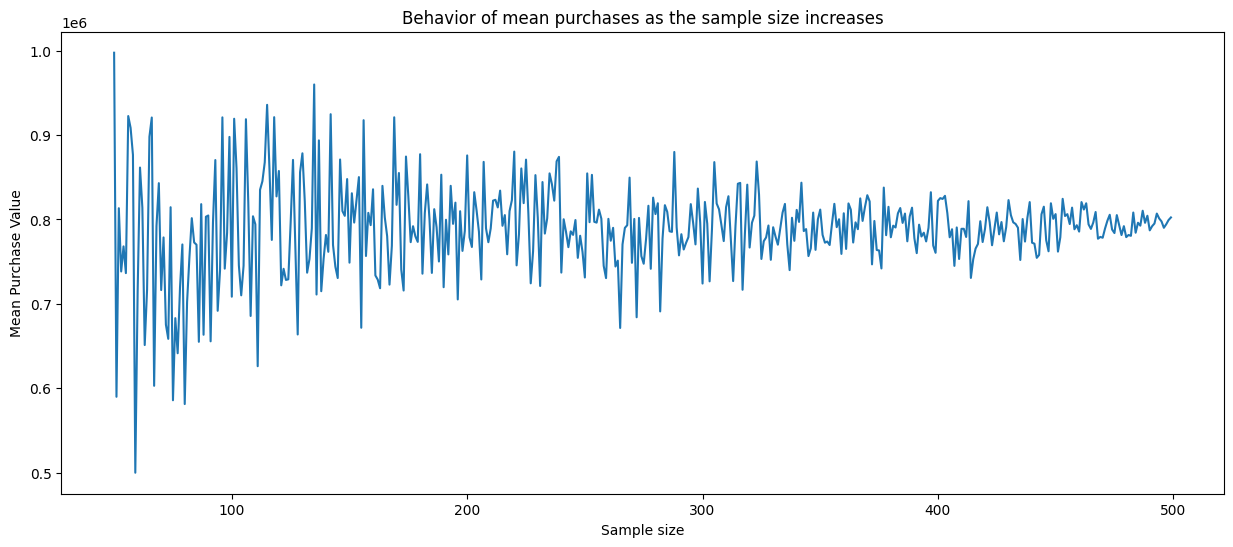

In [381]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases
    # as the sample size increases

plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 500), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

Finding the confidence interval of total spending for each individual in the age group 46-50 on the Black Friday

In [383]:
means_a5 = []
size = w_age_46_to_50['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = w_age_46_to_50['Total_Purchase'].sample(size, replace = True).mean()
    means_a5.append(sample_mean)

[]

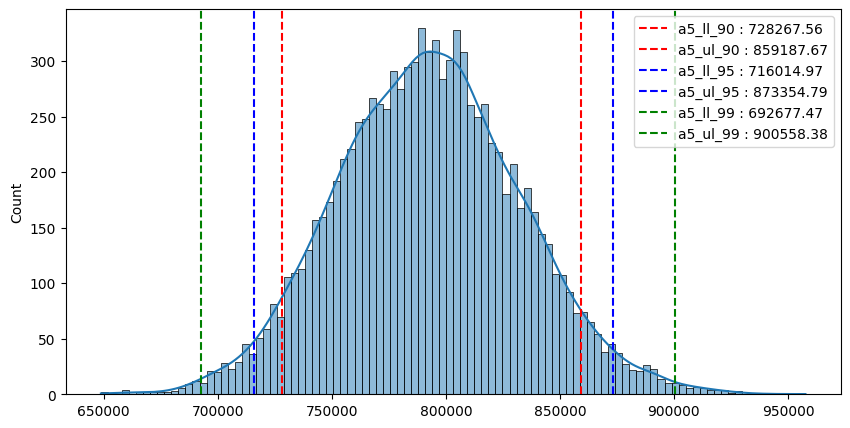

In [384]:
# The below code generates a histogram plot with kernel density estimation and
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (10, 5))
sns.histplot(means_a5, kde = True, bins = 100)

# calculating the lower limit & upper limit of the 90% confidence interval
a5_ll_90 = np.percentile(means_a5, 5)
a5_ul_90 = np.percentile(means_a5, 95)

# calculating the lower limit & upper limit of the 95% confidence interval
a5_ll_95 = np.percentile(means_a5, 2.5)
a5_ul_95 = np.percentile(means_a5, 97.5)

# calculating the lower limit & upper limit of the 99% confidence interval
a5_ll_99 = np.percentile(means_a5, 0.5)
a5_ul_99 = np.percentile(means_a5, 99.5)

plt.axvline(a5_ll_90, label = f'a5_ll_90 : {round(a5_ll_90, 2)}', linestyle = '--', color = 'red')
plt.axvline(a5_ul_90, label = f'a5_ul_90 : {round(a5_ul_90, 2)}', linestyle = '--', color = 'red')

plt.axvline(a5_ll_95, label = f'a5_ll_95 : {round(a5_ll_95, 2)}', linestyle = '--', color = 'blue')
plt.axvline(a5_ul_95, label = f'a5_ul_95 : {round(a5_ul_95, 2)}', linestyle = '--', color = 'blue')

plt.axvline(a5_ll_99, label = f'a5_ll_99 : {round(a5_ll_99, 2)}', linestyle = '--', color = 'green')
plt.axvline(a5_ul_99, label = f'a5_ul_99 : {round(a5_ul_99, 2)}', linestyle = '--', color = 'green')

plt.legend()
plt.plot()

**Observation**:

Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 46 - 50 years on Black Friday at Walmart, despite having data for only 531 individuals having age group 46 - 50 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 46 - 50 years falls, with a certain level of confidence.

In [385]:
print(f"The population mean of total spending of each customer in age group 46-50 will be approximately = {np.round(np.mean(means_a5), 2)} ")

The population mean of total spending of each customer in age group 46-50 will be approximately = 792628.97 


# **Final Insights**

 - Out of every four transactions made on Black Friday in the Walmart stores, three are made by the males and one is made by the females.
 - 82.33% of the total transactions are made by the customers belonging to 11 occupations. These are [4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6] (Ordered in descending order of the total transactions' share.)
 - Majority of the transactions (53.75% of total transactions) are made by the customers having 1-2 years of stay in the current city.
 - 82.43% of the total transactions are made for only 5 Product Categories. These are [5, 1, 8, 11 and 2].
 - There are 1666 unique female customers and 4225 unique male customers. Average number of transactions made by each Male on Black Friday is 98 while for Female it is 82.
 - On an average each male makes a total purchase of 925438 on Black Friday while for each female the figure is 712269.
 - 76.72% of the total revenue is generated from Males.
 - Out of 5891 unique customers, 42% of them are Married and 58% of them are Unmarried.
 - Average number of transactions made by each user with marital status Married is 91 and for Married it is 95.
 - On an average each Married customer makes a total purchase of 843469 on Black Friday while for each Unmarried customer the figure is 880526.
 - 59.05% of the total revenue is generated from the customers who are Unmarried.
 - Majority of the transactions are made by the customers whose age is between 26-45 years.
 - About 81.82% of the total transactions are made by customers of age between 18-50 years.
 - Out of all unique customers,
 1. 35.85% belong to the age group of 26-35 years,
 2. 19.81% belong to the age group of 36-45 years,
 3. 18.15% belong to the age group of 18-25 years,
 4. 9.01 % belong to the age group of 46-50 years.
 - Walmart generated 86.21% of total revenue from customers in range 18-50 years on Black Friday.
 - Quick summary of Total revenues generated
 1. 39.87% from the customers having age group of 26-35 years,
 2. 20.15% from the customers having age group of 36-45 years,
 3. 17.93% from the customers having age group of 18-25 years,
 4. 8.26% from the customers having age group of 46-50 years.
 - Majority of the total unique customers belong to the city C. 82.26% of the total unique customers belong to city C and B.
 - Walmart generated 41.52% of the total revenue from the customers belonging to the city B, 32.65% from city C and 25.83% from city A on Black Friday.
 - Top 5 product categories from which Walmart made 84.36% of total revenue on Black Friday are [1, 5, 8, 6 and 2].
 - The population mean of total spending of each male will be approximately = 925156.
 - The population mean of total spending of each female will be approximately = 711789
 - The population mean of total spending of each single will be approximately = 880356
 - The population mean of total spending of each male will be approximately = 843632
 - The population mean of total spending of each customer in age group 0 -17 will be approximately = 617797
 - The population mean of total spending of each customer in age group 18 - 25 will be approximately = 854676
 - The population mean of total spending of each customer in age group 26 - 35 will be approximately = 989120
 - The population mean of total spending of each customer in age group 36 - 45 will be approximately = 879434
 - The population mean of total spending of each customer in age group 46 - 50 will be approximately = 792671

# **Recommendations**

 - **Targeted marketing**:

 Since the majority of transactions are made by males, it would be beneficial to tailor marketing strategies to cater to their preferences and needs. This could include specific promotions, product offerings, or advertising campaigns designed to attract male customers.

 - **Focus on popular occupations**:

 Given that 82.33% of transactions come from customers in 11 specific occupations, it would be wise to focus marketing efforts on these occupations. Understanding the needs and preferences of individuals in these occupations can help in creating targeted marketing campaigns and customized offers.

 - **Engage with new residents**:

 As a significant portion of transactions (53.75%) come from customers who have recently moved to the current city, it presents an opportunity to engage with these new residents. Targeted marketing, welcoming offers, and incentives for newcomers can help capture their loyalty and increase their spending.

 - **Emphasize popular product categories**:

 Since 82.43% of transactions are concentrated in just five product categories, allocating resources and promotions towards these categories can maximize sales potential. Highlighting these popular categories and offering attractive deals can encourage more purchases.

 - **Increase focus on single customers**:

 Given that 59.05% of total revenue is generated by single customers, dedicating efforts to cater to their needs and preferences can help drive more sales. Understanding their motivations and targeting them with personalized offers can enhance their shopping experience and loyalty.

 - **Optimize revenue from specific age groups**:

 Since a majority of transactions are made by customers between the ages of 26 and 45, it is important to focus marketing efforts on this demographic. Offering products and services that align with their interests and values can maximize revenue generation.

 - **Location-based marketing**:

 With a significant number of customers belonging to specific cities, tailoring marketing strategies to target these locations can lead to better results. Allocating resources, promotions, and events based on the customer concentration in each city can help drive sales.

 - **Emphasize top-selling product categories**:

 The top five product categories generate a substantial portion of total revenue. Investing in these categories, ensuring a wide range of options and competitive pricing, can capitalize on customer demand and drive overall sales.

 - **Personalized offers for high spenders**:

 Identifying customers with high total spending, such as males or customers in specific age groups, allows for targeted marketing and personalized offers. Providing exclusive discounts, loyalty rewards, or special privileges to these customers can encourage repeat purchases and increase customer satisfaction.

 - **Implement loyalty program**:

 Implementating a loyalty program that offers incentives, rewards, and exclusive deals to encourage repeat purchases and increase customer retention. Targeted loyalty programs can be designed for male customers, single customers, and customers in specific age groups.

 - **Enhance product offerings**:

 Analyze the popular product categories and identify opportunities to expand the product range within those categories. This can attract more customers and increase sales. Additionally, identify complementary products or cross-selling opportunities to encourage customers to make additional purchases.

 - **Customer engagement**:

 Implement targeted marketing campaigns and communication strategies to engage customers regularly. This can include personalized email campaigns, social media engagement, and special promotions tailored to different customer segments. Keeping customers informed about new products, offers, and events can increase their engagement and encourage them to make more purchases.

 - **Collaborations and partnerships**:

 Explore collaborations with popular brands or influencers that resonate with the target customer segments. These collaborations can help attract new customers, create buzz, and increase brand visibility. It can also provide opportunities for joint promotions or exclusive offers.

 - **Seasonal and event-based promotions**:

 Leverage seasonal events, holidays, and special occasions to offer targeted promotions and discounts. Aligning marketing campaigns and product offerings with these events can create a sense of urgency and drive sales.

 - **Customer feedback and reviews**:

 Actively seek feedback from customers to understand their preferences, pain points, and suggestions for improvement. Encourage customers to leave reviews and ratings to build social proof and credibility. Utilize this feedback to make necessary improvements and refine the customer experience.

 - **Personalization and customization**:

 Invest in technology and data analytics to provide personalized recommendations, product suggestions, and customized offers based on individual customer preferences and past purchase history. This level of personalization can enhance the customer experience and increase conversion rates.

 - **Competitive pricing and promotions**:

 Continuously monitor competitors' pricing and promotional activities to ensure competitiveness. Offer price-match guarantees or price comparison tools to instill confidence in customers that they are getting the best value for their purchases.
